# Predicting the Average Price

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("avocado.csv")
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [3]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
df.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


# Exploratory Data Analysis (EDA)

In [5]:
df.shape

(18249, 14)

In [6]:
df.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


We can observe that there are 9 float data type, 2 integer data type and 3 object data type columns.

We can also see that the "Date" column is of object data type. We will change it to datetime data type later.

In [8]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

We can see that there are no null values in any of the columns.

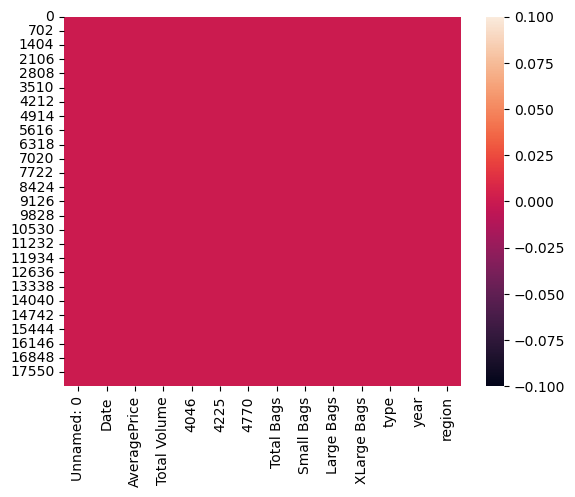

In [9]:
sns.heatmap(df.isnull())
plt.show()

We can also visualize from the above heatmap that there are no null values in the dataset.

In [10]:
#Check the counts of unique values of each column
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

0     432
7     432
1     432
11    432
9     432
8     432
10    432
6     432
5     432
4     432
3     432
2     432
41    324
34    324
35    324
36    324
37    324
38    324
39    324
40    324
47    324
42    324
43    324
44    324
45    324
46    324
32    324
48    324
49    324
50    324
33    324
26    324
31    324
30    324
12    324
13    324
14    324
15    324
16    324
17    324
18    324
19    324
20    324
21    324
22    324
23    324
24    324
25    324
27    324
28    324
29    324
51    322
52    107
Name: Unnamed: 0, dtype: int64


2015-12-27    108
2017-12-24    108
2017-12-10    108
2017-12-03    108
2017-11-26    108
             ... 
2016-11-06    108
2018-01-07    108
2017-06-18    107
2017-06-25    107
2015-12-06    107
Name: Date, Length: 169, dtype: int64


1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
3.25      1
3.12      1
2.68      1
3.03      1
3.17      1
Name: AveragePrice, Length: 259, dtype: int64


4103.97       2
352

We can see that some columns contain continuous data and some contain categorical data.

The unnamed column is irrelevant. So, we will remove that column.

In [11]:
#Drop the irrelevant column
df.drop('Unnamed: 0',axis=1,inplace=True)

In [12]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


Now, we will change the data type of the "Date" column to datetime and derive "Month" and "Day" columns from it so that we can use them later.

In [13]:
df["Date"]=pd.to_datetime(df["Date"])
df["Month"]=df["Date"].dt.month
df["Day"]=df["Date"].dt.day
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,2,4
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,1,28
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,1,21
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,1,14


Now, we have 15 columns after adding "Month" and "Day" columns to the dataset.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          18249 non-null  datetime64[ns]
 1   AveragePrice  18249 non-null  float64       
 2   Total Volume  18249 non-null  float64       
 3   4046          18249 non-null  float64       
 4   4225          18249 non-null  float64       
 5   4770          18249 non-null  float64       
 6   Total Bags    18249 non-null  float64       
 7   Small Bags    18249 non-null  float64       
 8   Large Bags    18249 non-null  float64       
 9   XLarge Bags   18249 non-null  float64       
 10  type          18249 non-null  object        
 11  year          18249 non-null  int64         
 12  region        18249 non-null  object        
 13  Month         18249 non-null  int64         
 14  Day           18249 non-null  int64         
dtypes: datetime64[ns](1), float64(9), in

We can see above that the data type of the "Date" column has been converted to datetime and "Month" and "Day" columns with integer data type have been added.

We will rename the columns "4046", "4225" and "4770" for better understanding.

In [15]:
df.rename(columns={'4046':'PLU-4046 Sold','4225':'PLU-4225 Sold','4770':'PLU-4770 Sold'},inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           18249 non-null  datetime64[ns]
 1   AveragePrice   18249 non-null  float64       
 2   Total Volume   18249 non-null  float64       
 3   PLU-4046 Sold  18249 non-null  float64       
 4   PLU-4225 Sold  18249 non-null  float64       
 5   PLU-4770 Sold  18249 non-null  float64       
 6   Total Bags     18249 non-null  float64       
 7   Small Bags     18249 non-null  float64       
 8   Large Bags     18249 non-null  float64       
 9   XLarge Bags    18249 non-null  float64       
 10  type           18249 non-null  object        
 11  year           18249 non-null  int64         
 12  region         18249 non-null  object        
 13  Month          18249 non-null  int64         
 14  Day            18249 non-null  int64         
dtypes: datetime64[ns](1

In [18]:
#Statistical summary of numerical columns
df.describe()

,AveragePrice,Total Volume,PLU-4046 Sold,PLU-4225 Sold,PLU-4770 Sold,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899,6.177215,15.662612
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938,3.534130,8.776281
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000,1.000000,1.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000,3.000000,8.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000,6.000000,16.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000,9.000000,23.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000,12.000000,31.000000


We can observe the following:

There are no missing values in the dataset.

The columns "Total Volume", "PLU-4046 Sold", "PLU-4225 Sold", "PLU-4770 Sold", "Total Bags", "Small Bags", "Large Bags" and "XLarge Bags" have right skewness as the mean is bigger than the median.

Most of the features have outliers as max is much bigger than 75% in these features.

# Data Visualization

Univariate Analysis

Let's visualize the distribution of each variable

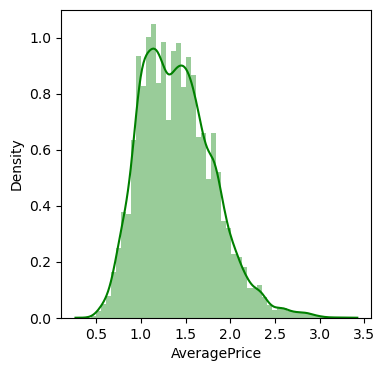

In [19]:
#Visualize the distribution of the label "AveragePrice"
plt.figure(figsize=(4,4))
sns.distplot(df['AveragePrice'],color='green')
plt.show()

We can see that the distribution of the label "AveragePrice" is right skewed.

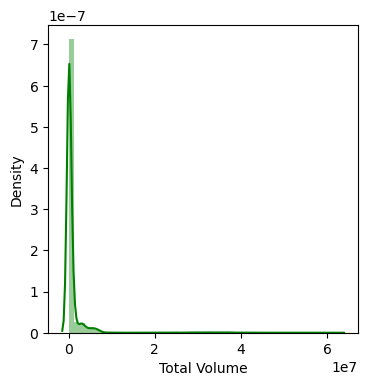

In [20]:
#Visualize the distribution of the feature "Total Volume"
plt.figure(figsize=(4,4))
sns.distplot(df['Total Volume'],color='green')
plt.show()

We can see that the distribution of the feature "Total Volume" is highly right skewed.

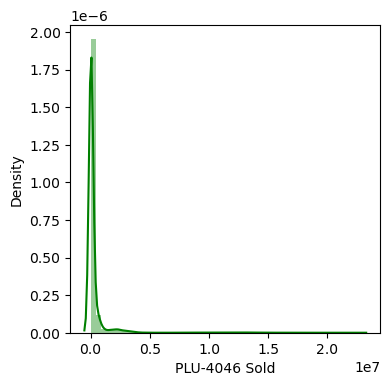

In [21]:
#Visualize the distribution of the feature "PLU-4046 Sold"
plt.figure(figsize=(4,4))
sns.distplot(df['PLU-4046 Sold'],color='green')
plt.show()

We can see that the distribution of the feature "PLU-4046 Sold" is highly right skewed.

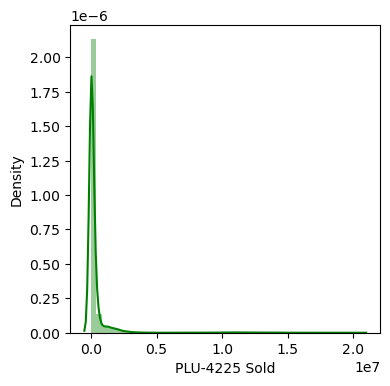

In [22]:
#Visualize the distribution of the feature "PLU-4225 Sold"
plt.figure(figsize=(4,4))
sns.distplot(df['PLU-4225 Sold'],color='green')
plt.show()

We can see that the distribution of the feature "PLU-4225 Sold" is highly right skewed.

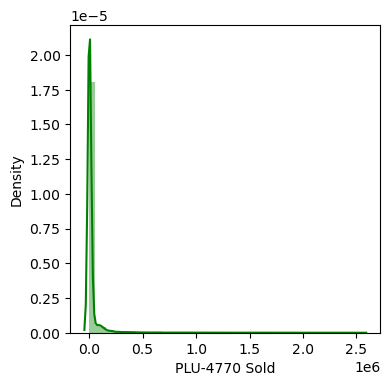

In [23]:
#Visualize the distribution of the feature "PLU-4770 Sold"
plt.figure(figsize=(4,4))
sns.distplot(df['PLU-4770 Sold'],color='green')
plt.show()

We can see that the distribution of the feature "PLU-4770 Sold" is highly right skewed.

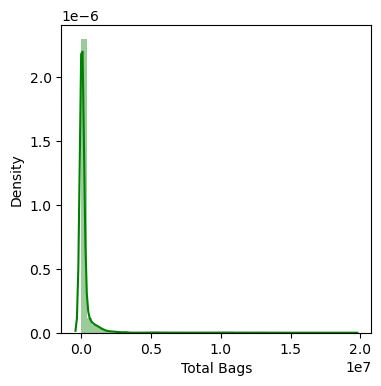

In [24]:
#Visualize the distribution of the feature "Total Bags"
plt.figure(figsize=(4,4))
sns.distplot(df['Total Bags'],color='green')
plt.show()

We can see that the distribution of the feature "Total Bags" is highly right skewed.

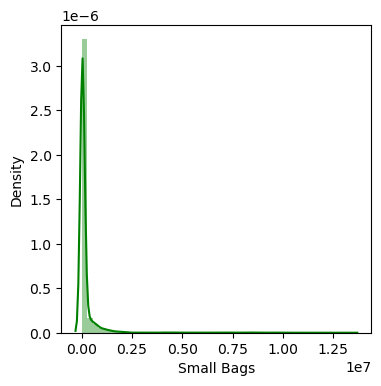

In [25]:
#Visualize the distribution of the feature "Small Bags"
plt.figure(figsize=(4,4))
sns.distplot(df['Small Bags'],color='green')
plt.show()

We can see that the distribution of the feature "Small Bags" is highly right skewed.

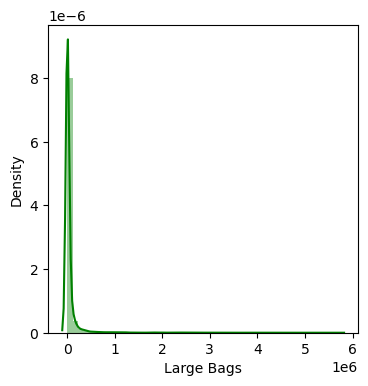

In [26]:
#Visualize the distribution of the feature "Large Bags"
plt.figure(figsize=(4,4))
sns.distplot(df['Large Bags'],color='green')
plt.show()

We can see that the distribution of the feature "Large Bags" is highly right skewed.

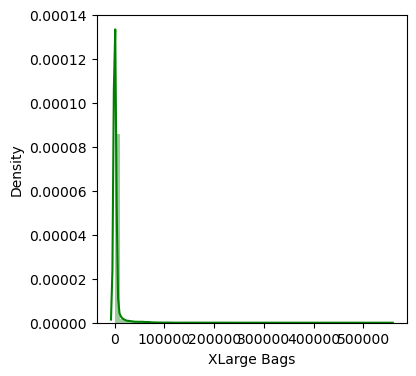

In [27]:
#Visualize the distribution of the feature "XLarge Bags"
plt.figure(figsize=(4,4))
sns.distplot(df['XLarge Bags'],color='green')
plt.show()

We can see that the distribution of the feature "XLarge Bags" is highly right skewed.

Bivariate Analysis

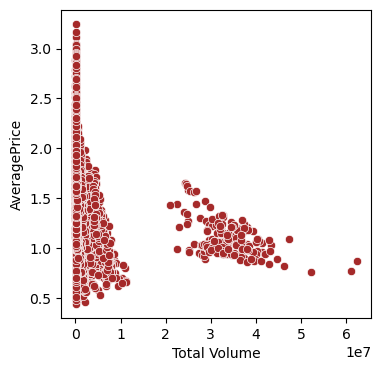

In [28]:
#Analyse the relationship between "Total Volume" and "AveragePrice"
plt.figure(figsize=(4,4))
sns.scatterplot(x='Total Volume',y='AveragePrice',data=df, color='brown')
plt.show()

There is not much correlation between "Total Volume" and "AveragePrice".

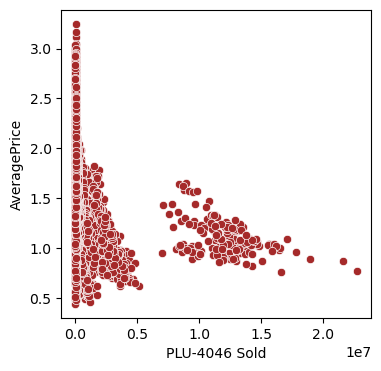

In [29]:
#Analyse the relationship between "PLU-4046 Sold" and "AveragePrice"
plt.figure(figsize=(4,4))
sns.scatterplot(x='PLU-4046 Sold',y='AveragePrice',data=df, color='brown')
plt.show()

There is not much correlation between "PLU-4046 Sold" and "AveragePrice".

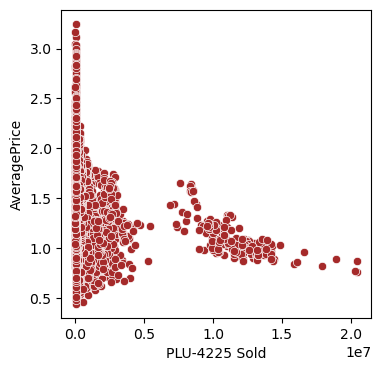

In [30]:
#Analyse the relationship between "PLU-4225 Sold" and "AveragePrice"
plt.figure(figsize=(4,4))
sns.scatterplot(x='PLU-4225 Sold',y='AveragePrice',data=df, color='brown')
plt.show()

There is not much correlation between "PLU-4225 Sold" and "AveragePrice".

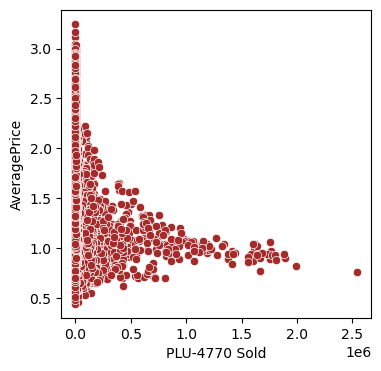

In [31]:
#Analyse the relationship between "PLU-4770 Sold" and "AveragePrice"
plt.figure(figsize=(4,4))
sns.scatterplot(x='PLU-4770 Sold',y='AveragePrice',data=df, color='brown')
plt.show()

There is not much correlation between "PLU-4770 Sold" and "AveragePrice".

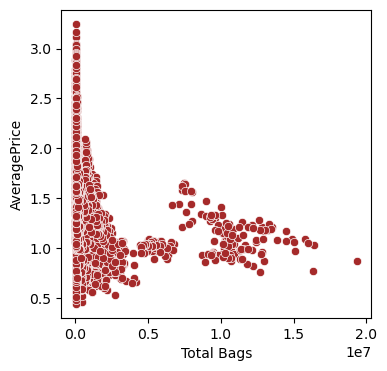

In [32]:
#Analyse the relationship between "Total Bags" and "AveragePrice"
plt.figure(figsize=(4,4))
sns.scatterplot(x='Total Bags',y='AveragePrice',data=df, color='brown')
plt.show()

There is not much correlation between "Total Bags" and "AveragePrice".

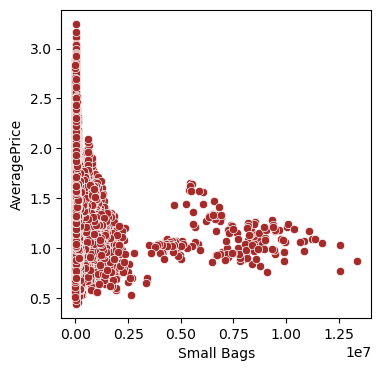

In [33]:
#Analyse the relationship between "Small Bags" and "AveragePrice"
plt.figure(figsize=(4,4))
sns.scatterplot(x='Small Bags',y='AveragePrice',data=df, color='brown')
plt.show()

There is not much correlation between "Small Bags" and "AveragePrice".

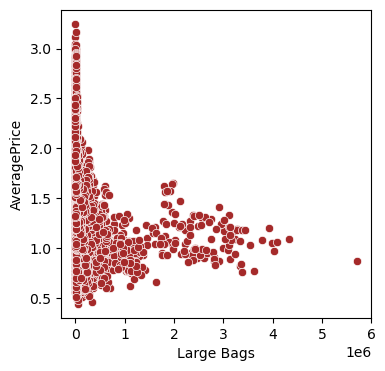

In [34]:
#Analyse the relationship between "Large Bags" and "AveragePrice"
plt.figure(figsize=(4,4))
sns.scatterplot(x='Large Bags',y='AveragePrice',data=df, color='brown')
plt.show()

There is not much correlation between "Large Bags" and "AveragePrice".

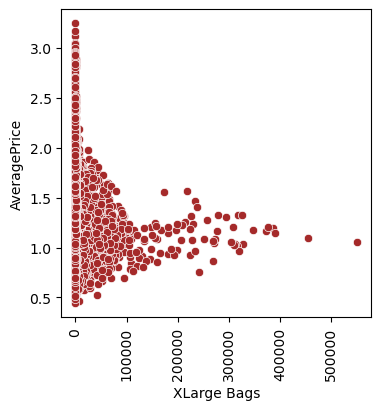

In [37]:
#Analyse the relationship between "XLarge Bags" and "AveragePrice"
plt.figure(figsize=(4,4))
sns.scatterplot(x='XLarge Bags',y='AveragePrice',data=df, color='brown')
plt.xticks(rotation=90)
plt.show()

There is not much correlation between "XLarge Bags" and "AveragePrice".

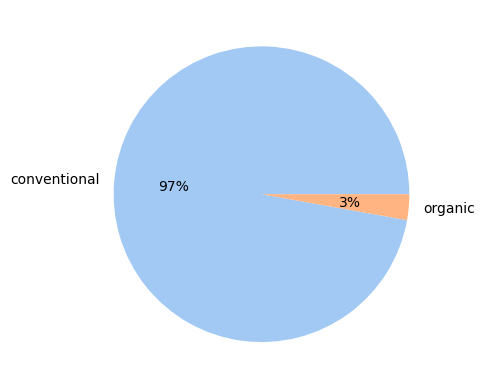

In [36]:
#Find out which type of avocado is more in demand
df_type=df.groupby('type')['Total Volume'].agg('sum')
labels=['conventional','organic']
colors=sns.color_palette('pastel')[0:5]
plt.pie(df_type, labels=labels, colors=colors, autopct='%.0f%%')
plt.show()

We can observe that organic avocadoes are very less in demand and conventional avocadoes are much higher in demand than organic ones.

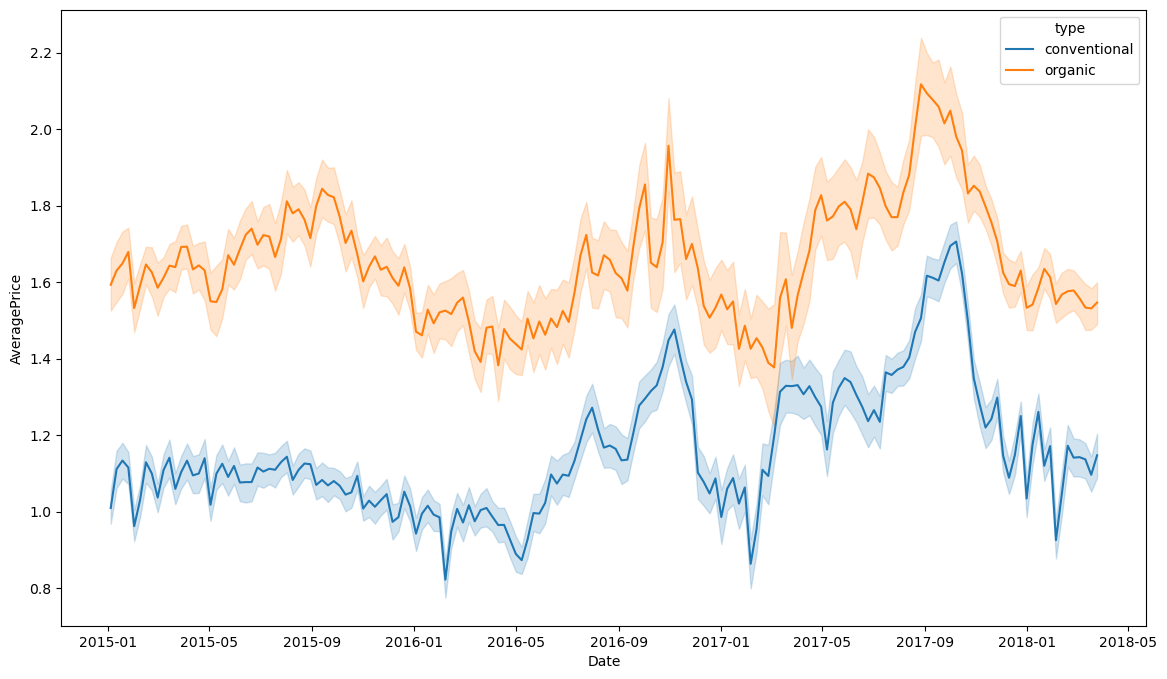

In [49]:
#The average prices of avocadoes at different points of time
plt.figure(figsize=(14,8))
sns.lineplot(x="Date", y="AveragePrice", hue='type', data=df)
plt.show()

The above plot shows the average price of conventional and organic avocadoes at different points of time. We can observe that the price of both types of avocadoes is at its peak during Sep to Nov 2017.

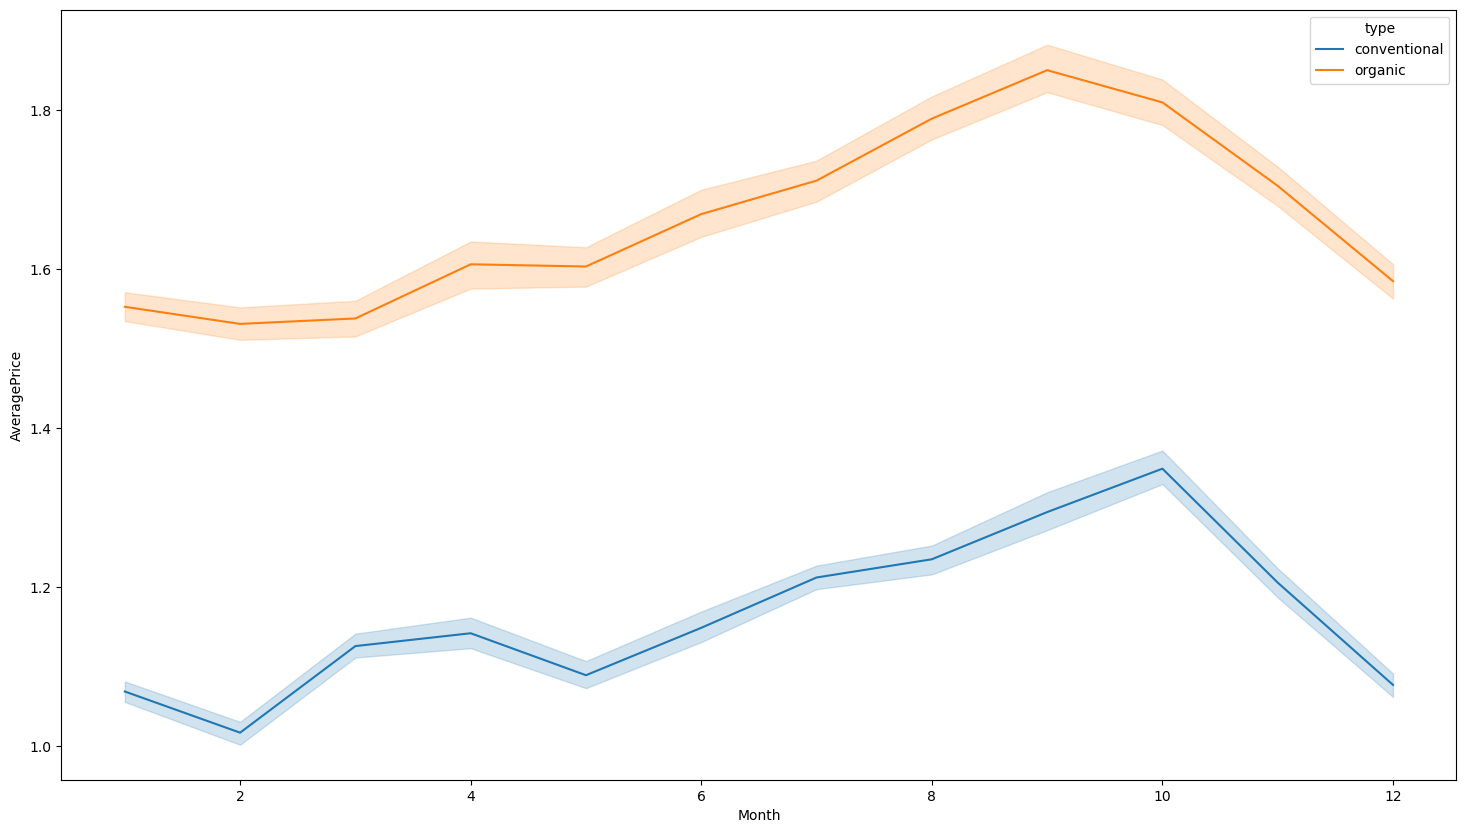

In [80]:
#The average prices of avocadoes at different months of the year
plt.figure(figsize=(18,10))
sns.lineplot(x="Month", y="AveragePrice", hue='type', data=df)
plt.show()

We can observe from the above plot that the average prices of both conventional and organic avocadoes are usually at their highest during the months 9 and 10 i.e. Sep and Oct.

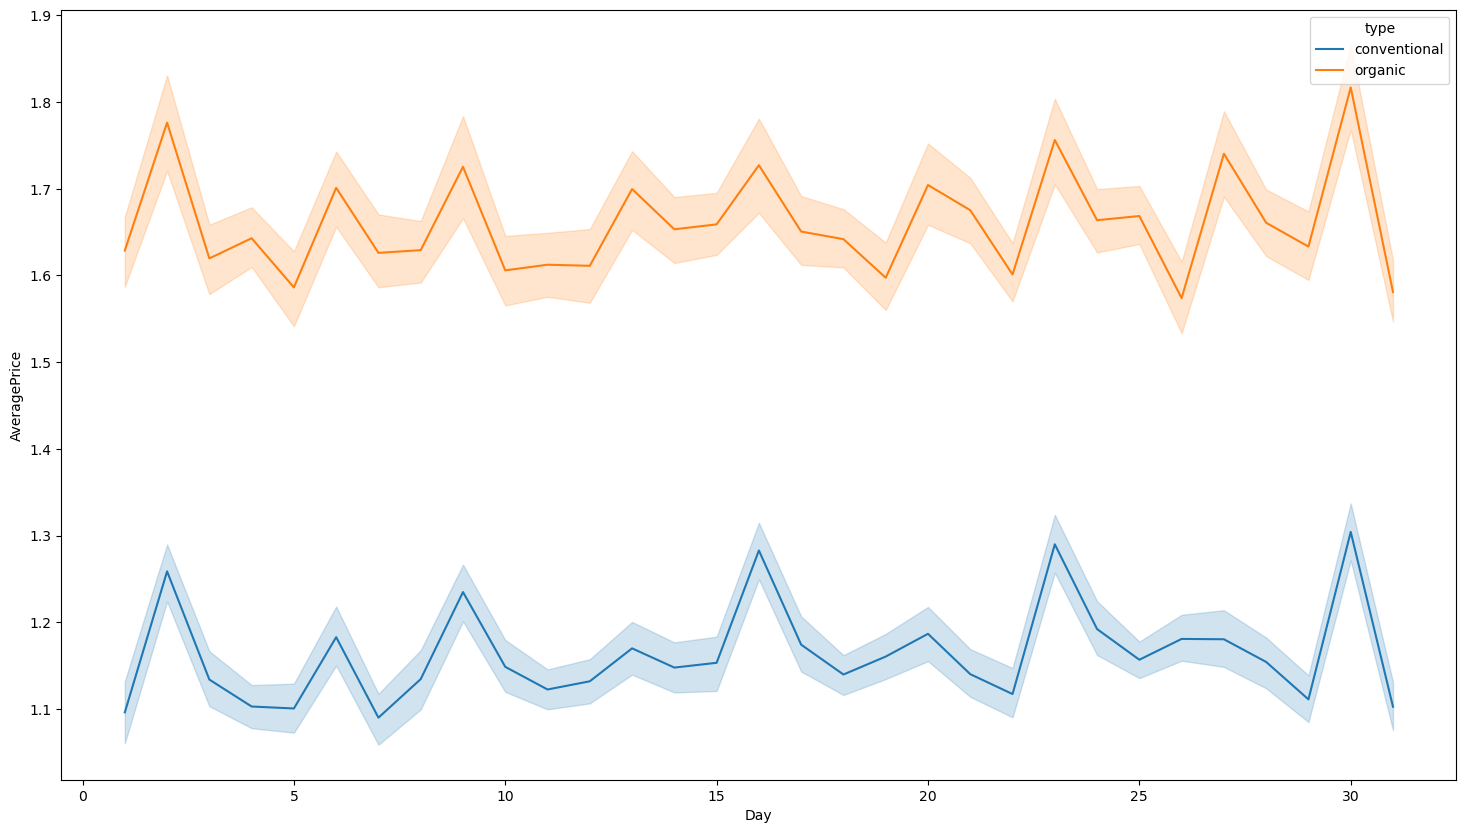

In [81]:
#The average prices of avocadoes at different days of the month
plt.figure(figsize=(18,10))
sns.lineplot(x="Day", y="AveragePrice", hue='type', data=df)
plt.show()

We can observe that the average prices of both conventional and organic avocadoes fluctuate in a similar manner at a regualr interval.

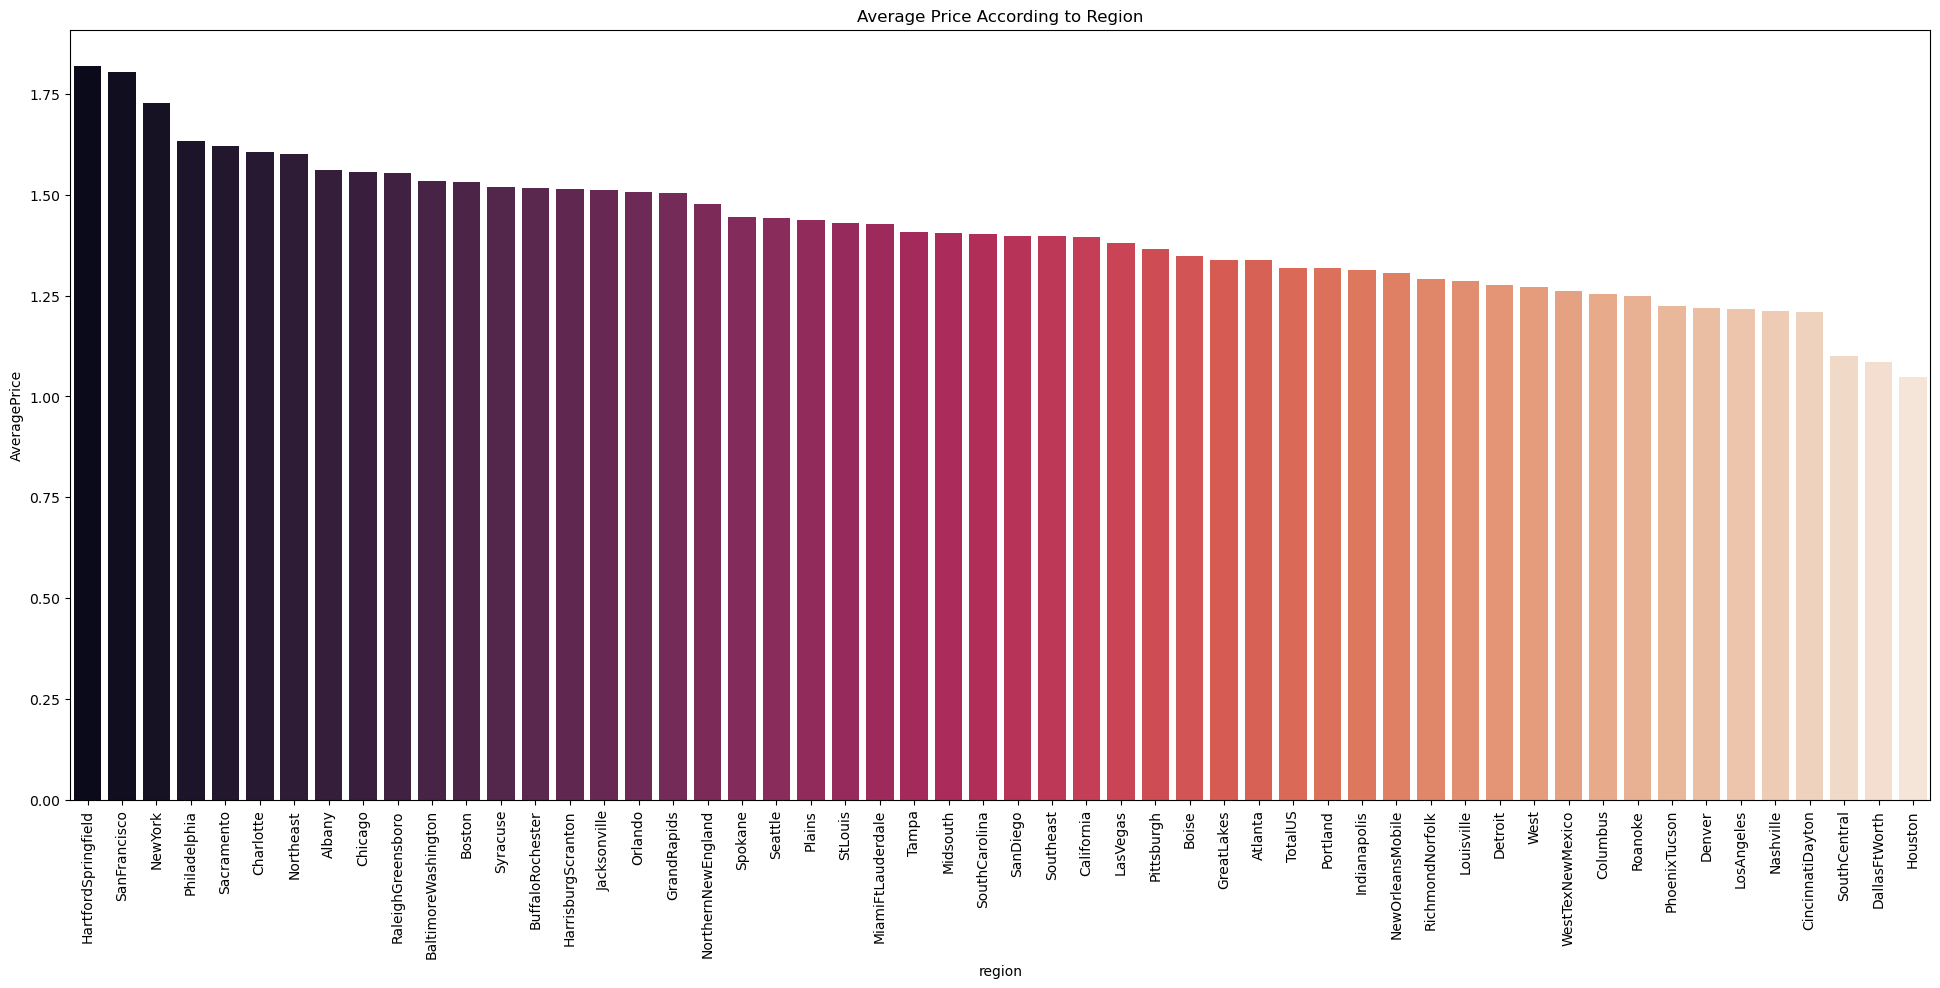

In [85]:
#Find out the average price of avocado at various regions
df_region=df.groupby('region').mean()
df_region.sort_values(by=['AveragePrice'],ascending=False,inplace=True)
plt.figure(figsize=(24,10))
sns.barplot(x=df_region.index,y=df_region['AveragePrice'],data=df_region,palette='rocket')
plt.xticks(rotation=90)
plt.title('Average Price According to Region')
plt.show()

We can observe that the average price of avocado is the highest in the region "HartfordSpringfield" and the lowest in the region "Houston".

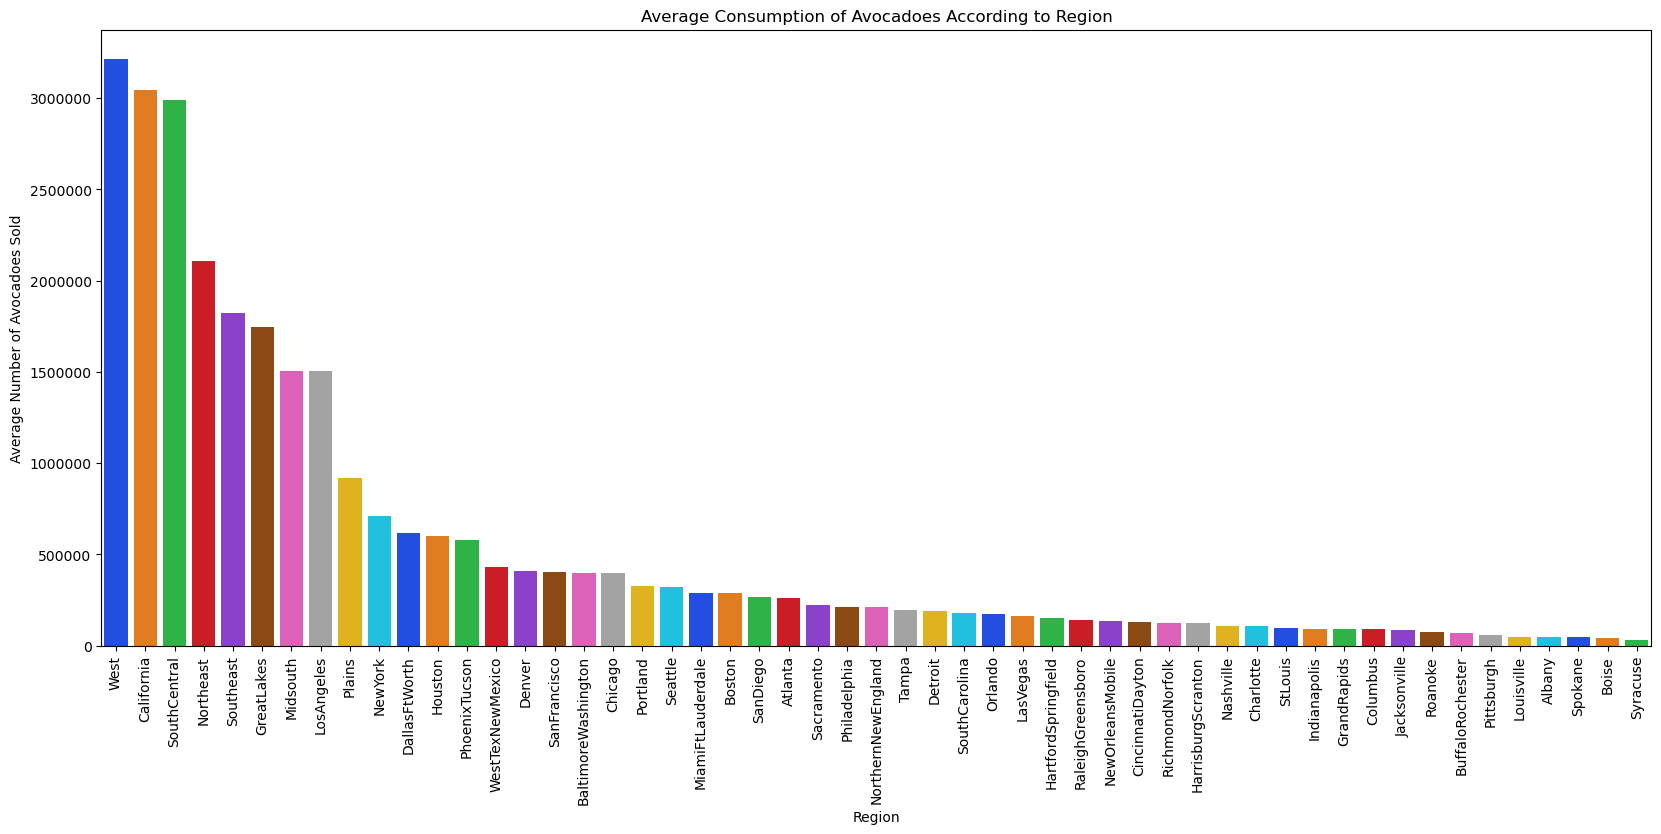

In [106]:
#Find out the average consumption of avocadoes at various regions
df_region=df.groupby('region').mean()
df_region.drop('TotalUS',axis=0,inplace=True) #Dropping TotalUS region which contains total of all regions
df_region.sort_values(by=['Total Volume'],ascending=False,inplace=True)
plt.figure(figsize=(20,8))
sns.barplot(x=df_region.index,y=df_region['Total Volume'],data=df_region,palette='bright')
plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Number of Avocadoes Sold')
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.title('Average Consumption of Avocadoes According to Region')
plt.show()

We can observe that the average consumption of avocadoes is the highest in the region "West" and the lowest in the region "Syracuse".

We will drop the "Date" column as it is useless now.

In [107]:
#Drop the "Date" column
df.drop('Date',axis=1,inplace=True)
df

,AveragePrice,Total Volume,PLU-4046 Sold,PLU-4225 Sold,PLU-4770 Sold,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,2,4
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,1,28
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,1,21
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,1,14


Checking for Outliers

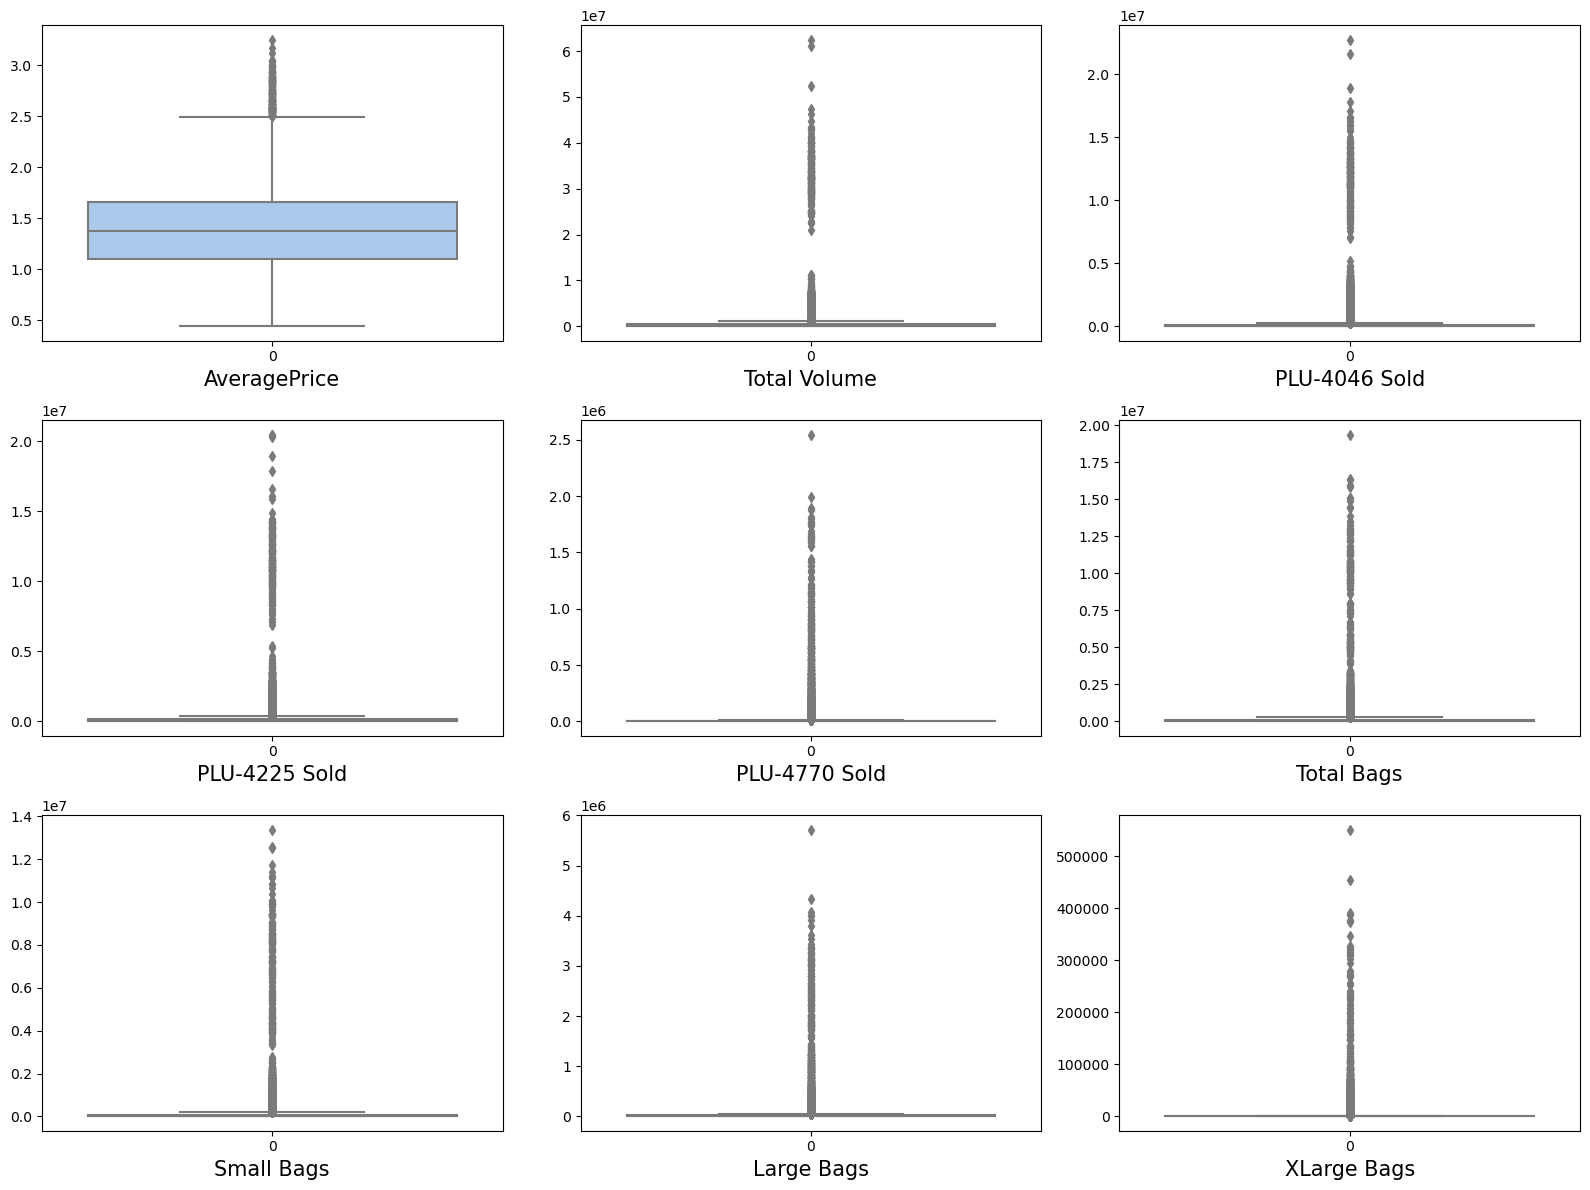

In [110]:
#Check for outliers in continuous data columns
out_columns=['AveragePrice','Total Volume','PLU-4046 Sold','PLU-4225 Sold','PLU-4770 Sold','Total Bags','Small Bags','Large Bags','XLarge Bags']
plt.figure(figsize=(16,12),facecolor="white")
plotnumber=1
for col in out_columns:
    ax=plt.subplot(3,3,plotnumber)
    sns.boxplot(df[col],palette="pastel")
    plt.xlabel(col,fontsize=15)
    plt.yticks(rotation=0,fontsize=10)
    plotnumber+=1
plt.tight_layout()

We can observe that there are a lot of outliers in all the columns. We don't remove outliers from the label "AveragePrice". So we will remove outliers from the features using Z-Score technique.

In [112]:
#Remove outliers
from scipy.stats import zscore
out_features=df[out_columns].drop("AveragePrice",axis=1)
z=np.abs(zscore(out_features))
df1=df[(z<3).all(axis=1)]

In [113]:
df1.shape

(17782, 14)

In [114]:
print("Data loss percentage - ",((df.shape[0]-df1.shape[0])/df.shape[0])*100)

Data loss percentage -  2.55904433119623


The data loss percentage is 2.55% which is less than 10% and hence acceptable.

Encoding Categorical Columns

In [115]:
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
df1['type']=OE.fit_transform(df1['type'].values.reshape(-1,1))
df1['region']=OE.fit_transform(df1['region'].values.reshape(-1,1))
df1

,AveragePrice,Total Volume,PLU-4046 Sold,PLU-4225 Sold,PLU-4770 Sold,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0.0,2015,0.0,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0.0,2015,0.0,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0.0,2015,0.0,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0.0,2015,0.0,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0.0,2015,0.0,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1.0,2018,53.0,2,4
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1.0,2018,53.0,1,28
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1.0,2018,53.0,1,21
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1.0,2018,53.0,1,14


Checking for Skewness

In [116]:
df1.skew()

AveragePrice     0.560969
Total Volume     3.782060
PLU-4046 Sold    4.928850
PLU-4225 Sold    4.472729
PLU-4770 Sold    5.137120
Total Bags       4.082103
Small Bags       4.238647
Large Bags       5.072468
XLarge Bags      6.159391
type            -0.052210
year             0.220792
region           0.005773
Month            0.098217
Day              0.011251
dtype: float64

We can see that the columns "AveragePrice", "Total Volume", "PLU-4046 Sold", "PLU-4225 Sold", "PLU-4770 Sold", "Total Bags", "Small Bags", "Large Bags" and "XLarge Bags" have skewness. We don't remove skewness from the label "AveragePrice". So, we will remove skewness from the other columns using Yeo-Johnson transformation method.

In [117]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method='yeo-johnson')
df1['Total Volume']=pt.fit_transform(df1[['Total Volume']])
df1['PLU-4046 Sold']=pt.fit_transform(df1[['PLU-4046 Sold']])
df1['PLU-4225 Sold']=pt.fit_transform(df1[['PLU-4225 Sold']])
df1['PLU-4770 Sold']=pt.fit_transform(df1[['PLU-4770 Sold']])
df1['Total Bags']=pt.fit_transform(df1[['Total Bags']])
df1['Small Bags']=pt.fit_transform(df1[['Small Bags']])
df1['Large Bags']=pt.fit_transform(df1[['Large Bags']])
df1['XLarge Bags']=pt.fit_transform(df1[['XLarge Bags']])

In [118]:
#Check skewness again
df1.skew()

AveragePrice     0.560969
Total Volume    -0.006809
PLU-4046 Sold   -0.038259
PLU-4225 Sold   -0.043246
PLU-4770 Sold    0.028015
Total Bags      -0.021531
Small Bags      -0.024657
Large Bags      -0.110061
XLarge Bags      0.860603
type            -0.052210
year             0.220792
region           0.005773
Month            0.098217
Day              0.011251
dtype: float64

So, the skewness has been reduced in all the features.

In [121]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17782 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AveragePrice   17782 non-null  float64
 1   Total Volume   17782 non-null  float64
 2   PLU-4046 Sold  17782 non-null  float64
 3   PLU-4225 Sold  17782 non-null  float64
 4   PLU-4770 Sold  17782 non-null  float64
 5   Total Bags     17782 non-null  float64
 6   Small Bags     17782 non-null  float64
 7   Large Bags     17782 non-null  float64
 8   XLarge Bags    17782 non-null  float64
 9   type           17782 non-null  float64
 10  year           17782 non-null  int64  
 11  region         17782 non-null  float64
 12  Month          17782 non-null  int64  
 13  Day            17782 non-null  int64  
dtypes: float64(11), int64(3)
memory usage: 2.0 MB


We can observe that after encoding, the data type of categorical features have been converted from object to float.

In [122]:
#Statistical summary of numerical columns
df1.describe()

,AveragePrice,Total Volume,PLU-4046 Sold,PLU-4225 Sold,PLU-4770 Sold,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
count,17782.000000,1.778200e+04,1.778200e+04,1.778200e+04,1.778200e+04,1.778200e+04,1.778200e+04,1.778200e+04,1.778200e+04,17782.000000,17782.000000,17782.000000,17782.000000,17782.000000
mean,1.415546,-1.598342e-16,-3.836020e-17,-1.278673e-17,7.672039e-17,-1.470474e-16,-1.278673e-16,1.246706e-16,3.836020e-17,0.513047,2016.141098,26.161624,6.194298,15.683613
std,0.402278,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,0.499844,0.939273,15.402194,3.537070,8.777845
min,0.440000,-3.007139e+00,-2.289976e+00,-2.596545e+00,-1.224990e+00,-3.490113e+00,-2.707121e+00,-1.622090e+00,-6.757024e-01,0.000000,2015.000000,0.000000,1.000000,1.000000
25%,1.110000,-8.893850e-01,-7.211570e-01,-7.230320e-01,-1.224990e+00,-7.795440e-01,-7.839707e-01,-7.399744e-01,-6.757024e-01,0.000000,2015.000000,13.000000,3.000000,8.000000
50%,1.380000,1.288525e-01,-5.903327e-02,6.103805e-02,8.187825e-02,1.389621e-01,9.604229e-02,7.351957e-02,-6.757024e-01,1.000000,2016.000000,26.000000,6.000000,16.000000
75%,1.670000,7.637095e-01,8.038253e-01,7.238626e-01,9.246428e-01,6.500337e-01,6.538445e-01,7.537775e-01,1.279004e+00,1.000000,2017.000000,39.000000,9.000000,23.000000
max,3.250000,2.221339e+00,2.297859e+00,2.497959e+00,1.885553e+00,2.593111e+00,2.702792e+00,2.350431e+00,1.720390e+00,1.000000,2018.000000,53.000000,12.000000,31.000000


We can observe that there are no missing values in any of the columns.

The skewness in most of the columns have been reduced as the mean is almost equal to the median.

In [123]:
#Check correlation between features and label
cor=df1.corr()
cor

,AveragePrice,Total Volume,PLU-4046 Sold,PLU-4225 Sold,PLU-4770 Sold,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
AveragePrice,1.000000,-0.576829,-0.548618,-0.448579,-0.491320,-0.564616,-0.493621,-0.477879,-0.387285,0.608447,0.099910,0.010428,0.157900,0.024742
Total Volume,-0.576829,1.000000,0.889083,0.924160,0.818568,0.939776,0.905098,0.681427,0.629592,-0.800828,0.076584,0.065709,-0.026332,-0.006248
PLU-4046 Sold,-0.548618,0.889083,1.000000,0.764679,0.736523,0.799354,0.778765,0.601899,0.573880,-0.725826,-0.002396,0.159390,-0.025919,-0.004558
PLU-4225 Sold,-0.448579,0.924160,0.764679,1.000000,0.796799,0.818511,0.784901,0.614878,0.584508,-0.747722,-0.004533,0.032273,-0.024708,-0.005919
PLU-4770 Sold,-0.491320,0.818568,0.736523,0.796799,1.000000,0.761641,0.754305,0.548457,0.616413,-0.780988,-0.051657,0.037805,-0.017377,0.001383
Total Bags,-0.564616,0.939776,0.799354,0.818511,0.761641,1.000000,0.949901,0.729652,0.613698,-0.725686,0.210924,0.065996,-0.014571,-0.003703
Small Bags,-0.493621,0.905098,0.778765,0.784901,0.754305,0.949901,1.000000,0.566307,0.603334,-0.720466,0.185955,0.051985,-0.010260,-0.000535
Large Bags,-0.477879,0.681427,0.601899,0.614878,0.548457,0.729652,0.566307,1.000000,0.452650,-0.500026,0.190295,0.086573,-0.016942,-0.000876
XLarge Bags,-0.387285,0.629592,0.573880,0.584508,0.616413,0.613698,0.603334,0.452650,1.000000,-0.665587,0.159574,-0.020865,0.018751,0.010241
type,0.608447,-0.800828,-0.725826,-0.747722,-0.780988,-0.725686,-0.720466,-0.500026,-0.665587,1.000000,0.007399,0.021970,-0.005044,-0.002469


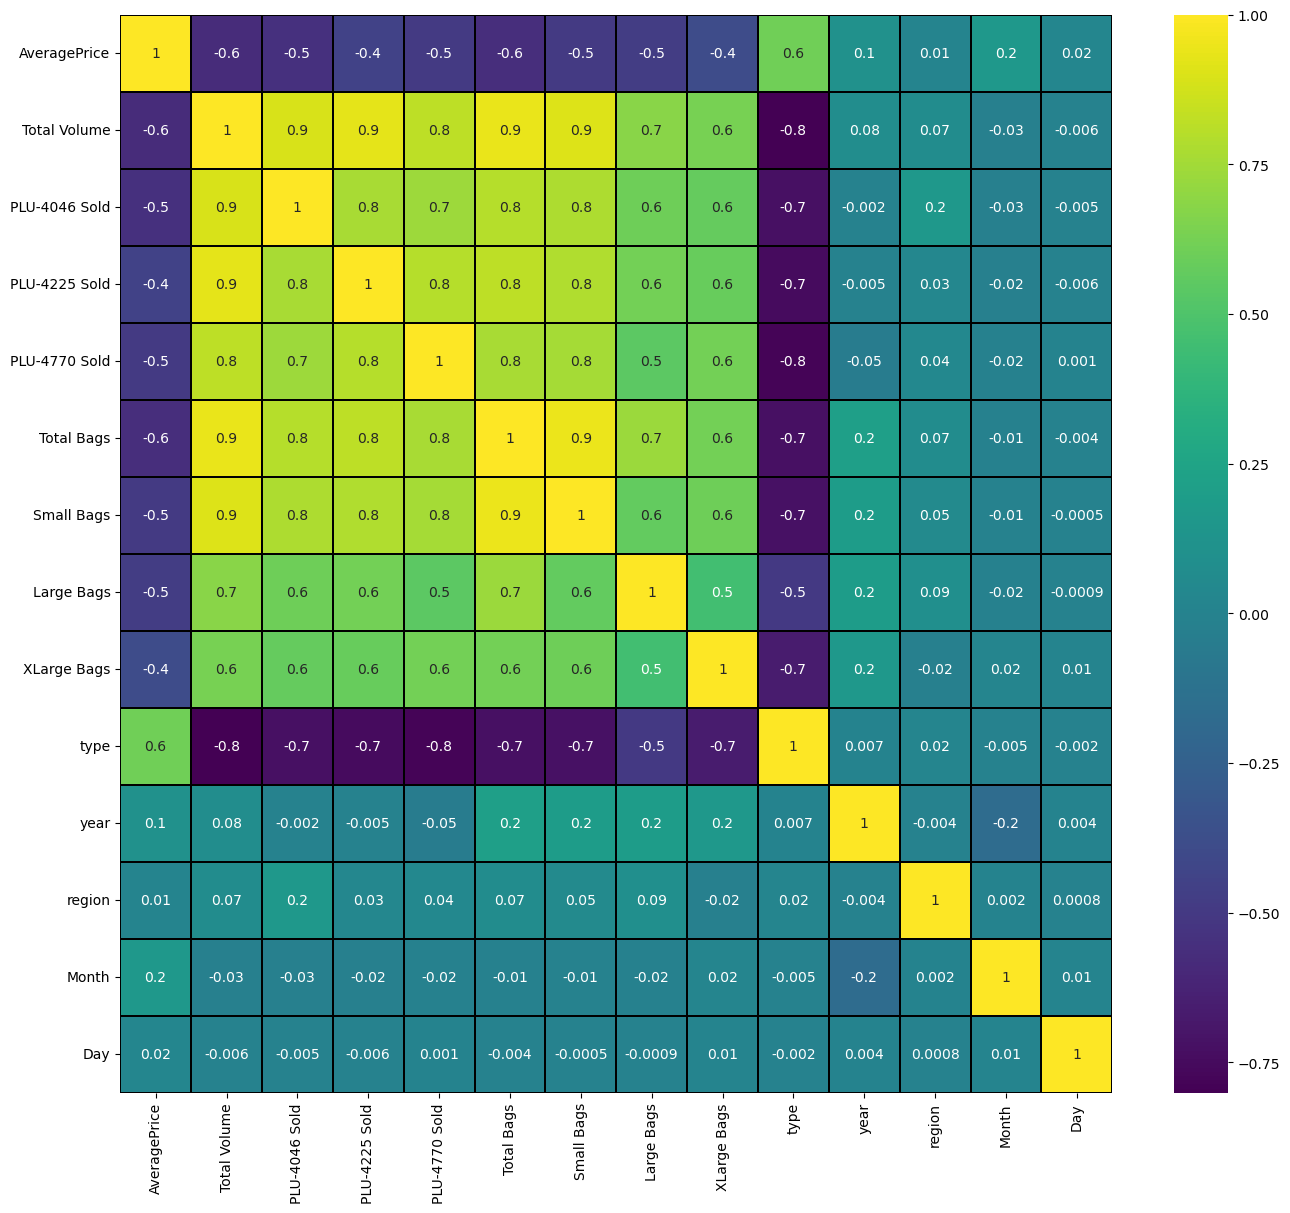

In [124]:
#Visualize the correlation between features and label
plt.figure(figsize=(16,14))
sns.heatmap(df1.corr(),linewidths=0.1,fmt='.1g',linecolor='black',annot=True,cmap='viridis')
plt.yticks(rotation=0)
plt.show()

We can observe the following:

The feature "type" has high positive correlation with the label "AveragePrice".

The features "Total Bags" and "Total Volume" have high negative correlation with the label "AveragePrice".

Most of the features are highly correlated with each other.

In [125]:
#Correlation between features and label
cor['AveragePrice'].sort_values(ascending=False)

AveragePrice     1.000000
type             0.608447
Month            0.157900
year             0.099910
Day              0.024742
region           0.010428
XLarge Bags     -0.387285
PLU-4225 Sold   -0.448579
Large Bags      -0.477879
PLU-4770 Sold   -0.491320
Small Bags      -0.493621
PLU-4046 Sold   -0.548618
Total Bags      -0.564616
Total Volume    -0.576829
Name: AveragePrice, dtype: float64

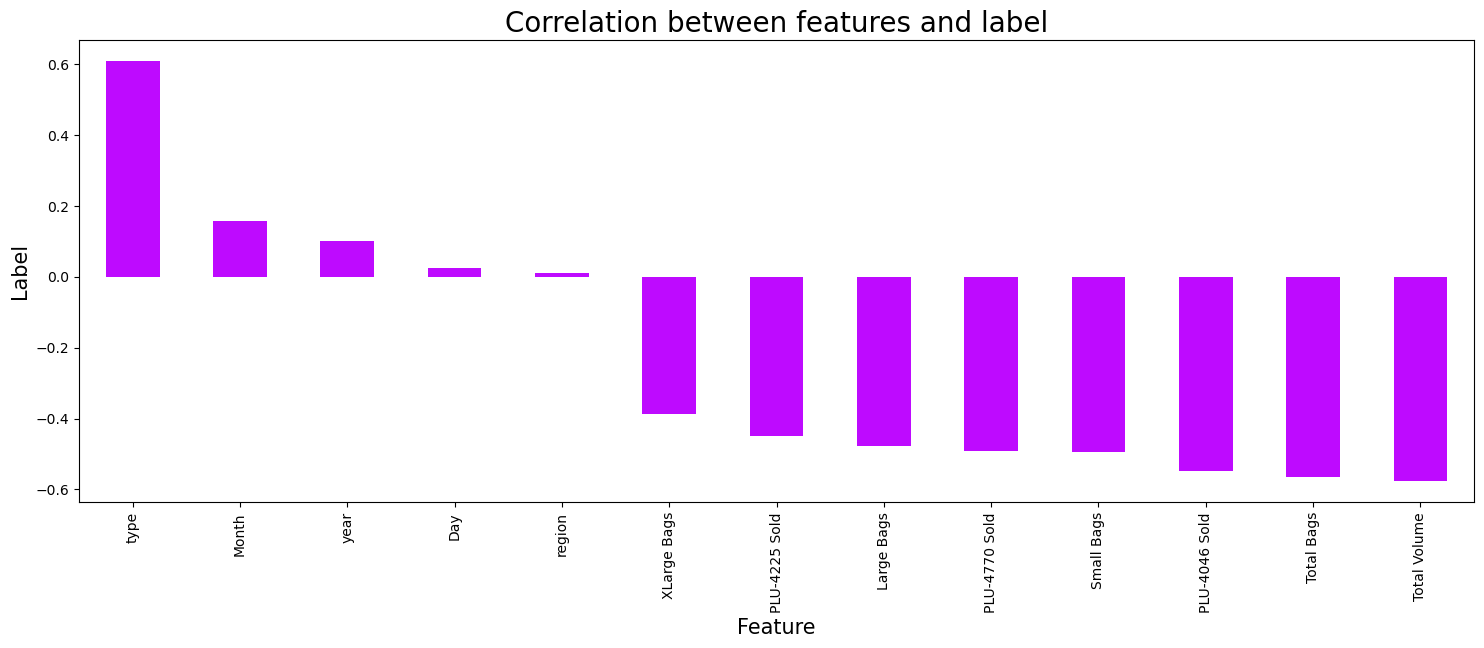

In [126]:
#Visualize the correlation between features and label
plt.figure(figsize=(18,6))
df1.corr()['AveragePrice'].sort_values(ascending=False).drop(['AveragePrice']).plot(kind='bar',color='#BE0AFF')
plt.xlabel('Feature',fontsize=15)
plt.ylabel('Label',fontsize=15)
plt.title('Correlation between features and label',fontsize=20)
plt.show()

We can observe that the feature "region" has very low correlation with the label "AveragePrice".

Separating features and label

In [127]:
x=df1.drop("AveragePrice",axis=1)
y=df1["AveragePrice"]

Feature Scaling

In [129]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,Total Volume,PLU-4046 Sold,PLU-4225 Sold,PLU-4770 Sold,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,-0.065094,-0.649918,0.358278,-0.212550,-0.527445,-0.337064,-0.775214,-0.675702,-1.026443,-1.214908,-1.698613,1.641434,1.289235
1,-0.137269,-0.770067,0.276355,-0.165117,-0.488205,-0.301038,-0.765237,-0.675702,-1.026443,-1.214908,-1.698613,1.641434,0.491750
2,0.215503,-0.724508,0.656010,0.034215,-0.556204,-0.364044,-0.752534,-0.675702,-1.026443,-1.214908,-1.698613,1.641434,-0.305734
3,0.029840,-0.625017,0.475615,-0.110976,-0.702370,-0.500341,-0.693012,-0.675702,-1.026443,-1.214908,-1.698613,1.641434,-1.103219
4,-0.170456,-0.677083,0.268966,-0.100289,-0.675712,-0.479918,-0.600755,-0.675702,-1.026443,-1.214908,-1.698613,1.358706,1.517088
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17777,-0.668931,-0.454078,-0.922232,-1.224990,-0.331042,-0.165765,-0.405895,-0.675702,0.974238,1.979143,1.742552,-1.185845,-1.331072
17778,-0.762380,-0.610403,-0.665649,-1.224990,-0.499550,-0.321645,-0.478556,-0.675702,0.974238,1.979143,1.742552,-1.468572,1.403161
17779,-0.766344,-0.610350,-0.774395,0.455355,-0.493424,-0.303466,-0.945246,-0.675702,0.974238,1.979143,1.742552,-1.468572,0.605677
17780,-0.692595,-0.539211,-0.711605,0.455045,-0.424475,-0.240252,-0.910471,-0.675702,0.974238,1.979143,1.742552,-1.468572,-0.191808


Now, all the features have been scaled to overcome the issue of biasness in the model.

Checking Variance Inflation Factor (VIF)

In [130]:
#Find out Variance Inflation Factor of each feature
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF Values"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"]=x.columns
vif

,VIF Values,Features
0,52.166379,Total Volume
1,7.156629,PLU-4046 Sold
2,11.180335,PLU-4225 Sold
3,3.954879,PLU-4770 Sold
4,34.508881,Total Bags
5,16.643418,Small Bags
6,3.463598,Large Bags
7,2.053740,XLarge Bags
8,3.718537,type
9,1.386933,year


We can see that the features "Total Volume", "PLU-4225 Sold", "Total Bags" and "Small Bags" have VIF values greater than 10 which indicates that there is multicollinearity problem with the features. So, we will remove the feature "Total Volume" which has the highest VIF value first and then see if the multicollinearity problem still exists.

In [131]:
#Copy x into a new dataframe and drop the column
x1=x.copy()
x1.drop("Total Volume",axis=1,inplace=True)

In [132]:
#Check the VIF values again
vif=pd.DataFrame()
vif["VIF Values"]=[variance_inflation_factor(x1.values,i) for i in range(len(x1.columns))]
vif["Features"]=x1.columns
vif

,VIF Values,Features
0,3.741925,PLU-4046 Sold
1,4.284739,PLU-4225 Sold
2,3.940725,PLU-4770 Sold
3,24.486614,Total Bags
4,16.643176,Small Bags
5,3.421784,Large Bags
6,2.039753,XLarge Bags
7,3.502162,type
8,1.384592,year
9,1.079289,region


Now, the features "Total Bags" and "Small Bags" have VIF values greater than 10. We will remove the feature "Total Bags".

In [133]:
#Drop the column
x1.drop("Total Bags",axis=1,inplace=True)

In [134]:
#Check the VIF values again
vif=pd.DataFrame()
vif["VIF Values"]=[variance_inflation_factor(x1.values,i) for i in range(len(x1.columns))]
vif["Features"]=x1.columns
vif

,VIF Values,Features
0,3.723160,PLU-4046 Sold
1,4.139977,PLU-4225 Sold
2,3.940502,PLU-4770 Sold
3,4.103569,Small Bags
4,1.866024,Large Bags
5,2.039339,XLarge Bags
6,3.498746,type
7,1.359839,year
8,1.079283,region
9,1.051207,Month


Now, none of the columns have VIF values greater than 10. Hence the problem of multicollinearity has been solved and we can proceed further.

In [135]:
#Copy x1 into the original dataframe x
x=x1.copy()

# Model Building

Finding the best random state

In [137]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    LR=LinearRegression()
    LR.fit(x_train,y_train)
    pred=LR.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum R2 Score is ",maxAccu,"on Random State ",maxRS)

Maximum R2 Score is  0.5274216709996749 on Random State  140


Creating train test split

In [138]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

Importing the necessary modules

In [139]:
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,ExtraTreesRegressor,AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor

In [140]:
#Linear Regression
LR=LinearRegression()
LR.fit(x_train,y_train)
pred_LR=LR.predict(x_test)
pred_train=LR.predict(x_train)
print("R2_score: ",r2_score(y_test,pred_LR))
print("R2_score on training data: ",r2_score(y_train,pred_train))
print("Mean Absolute Error: ",mean_absolute_error(y_test,pred_LR))
print("Mean Squared Error: ",mean_squared_error(y_test,pred_LR))
print("Root Mean Squared Error: ",np.sqrt(mean_squared_error(y_test,pred_LR)))

R2_score:  0.5274216709996749
R2_score on training data:  0.5015432707311686
Mean Absolute Error:  0.21642462864766362
Mean Squared Error:  0.07737795491156323
Root Mean Squared Error:  0.2781689323263172


In [141]:
#XGB Regressor
XGB=XGBRegressor()
XGB.fit(x_train,y_train)
pred_XGB=XGB.predict(x_test)
pred_train=XGB.predict(x_train)
print("R2_score: ",r2_score(y_test,pred_XGB))
print("R2_score on training data: ",r2_score(y_train,pred_train))
print("Mean Absolute Error: ",mean_absolute_error(y_test,pred_XGB))
print("Mean Squared Error: ",mean_squared_error(y_test,pred_XGB))
print("Root Mean Squared Error: ",np.sqrt(mean_squared_error(y_test,pred_XGB)))

R2_score:  0.8961629314285949
R2_score on training data:  0.9644190948865654
Mean Absolute Error:  0.09494985872512682
Mean Squared Error:  0.017001837615075135
Root Mean Squared Error:  0.13039109484575676


In [142]:
#Support Vector Machine Regressor
svr=SVR()
svr.fit(x_train,y_train)
pred_svr=svr.predict(x_test)
pred_train=svr.predict(x_train)
print("R2_score: ",r2_score(y_test,pred_svr))
print("R2_score on training data: ",r2_score(y_train,pred_train))
print("Mean Absolute Error: ",mean_absolute_error(y_test,pred_svr))
print("Mean Squared Error: ",mean_squared_error(y_test,pred_svr))
print("Root Mean Squared Error: ",np.sqrt(mean_squared_error(y_test,pred_svr)))

R2_score:  0.7783070714372897
R2_score on training data:  0.8036917909871129
Mean Absolute Error:  0.13949398353880285
Mean Squared Error:  0.03629905219485
Root Mean Squared Error:  0.19052310147289225


In [143]:
#Random Forest Regressor
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)
pred_RFR=RFR.predict(x_test)
pred_train=RFR.predict(x_train)
print("R2_score: ",r2_score(y_test,pred_RFR))
print("R2_score on training data: ",r2_score(y_train,pred_train))
print("Mean Absolute Error: ",mean_absolute_error(y_test,pred_RFR))
print("Mean Squared Error: ",mean_squared_error(y_test,pred_RFR))
print("Root Mean Squared Error: ",np.sqrt(mean_squared_error(y_test,pred_RFR)))

R2_score:  0.8787038621897574
R2_score on training data:  0.9829723073046059
Mean Absolute Error:  0.09750374882849108
Mean Squared Error:  0.019860510959700095
Root Mean Squared Error:  0.14092732509949976


In [144]:
#Gradient Boosting Regressor
GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
pred_GBR=GBR.predict(x_test)
pred_train=GBR.predict(x_train)
print("R2_score: ",r2_score(y_test,pred_GBR))
print("R2_score on training data: ",r2_score(y_train,pred_train))
print("Mean Absolute Error: ",mean_absolute_error(y_test,pred_GBR))
print("Mean Squared Error: ",mean_squared_error(y_test,pred_GBR))
print("Root Mean Squared Error: ",np.sqrt(mean_squared_error(y_test,pred_GBR)))

R2_score:  0.7453724484987665
R2_score on training data:  0.7523725044886268
Mean Absolute Error:  0.15507746318289647
Mean Squared Error:  0.04169162653095468
Root Mean Squared Error:  0.20418527501011105


In [145]:
#Extra Trees Regressor
ETR=ExtraTreesRegressor()
ETR.fit(x_train,y_train)
pred_ETR=ETR.predict(x_test)
pred_train=ETR.predict(x_train)
print("R2_score: ",r2_score(y_test,pred_ETR))
print("R2_score on training data: ",r2_score(y_train,pred_train))
print("Mean Absolute Error: ",mean_absolute_error(y_test,pred_ETR))
print("Mean Squared Error: ",mean_squared_error(y_test,pred_ETR))
print("Root Mean Squared Error: ",np.sqrt(mean_squared_error(y_test,pred_ETR)))

R2_score:  0.9077609705600432
R2_score on training data:  1.0
Mean Absolute Error:  0.08408009372071225
Mean Squared Error:  0.015102824279287715
Root Mean Squared Error:  0.12289354856658552


In [146]:
#AdaBoost Regressor
ABR=AdaBoostRegressor()
ABR.fit(x_train,y_train)
pred_ABR=ABR.predict(x_test)
pred_train=ABR.predict(x_train)
print("R2_score: ",r2_score(y_test,pred_ABR))
print("R2_score on training data: ",r2_score(y_train,pred_train))
print("Mean Absolute Error: ",mean_absolute_error(y_test,pred_ABR))
print("Mean Squared Error: ",mean_squared_error(y_test,pred_ABR))
print("Root Mean Squared Error: ",np.sqrt(mean_squared_error(y_test,pred_ABR)))

R2_score:  0.5662079245937378
R2_score on training data:  0.556801901220008
Mean Absolute Error:  0.21593496958859718
Mean Squared Error:  0.0710272595926761
Root Mean Squared Error:  0.26650939869482293


In [147]:
#KNeighbors Regressor
KNN=KNeighborsRegressor()
KNN.fit(x_train,y_train)
pred_KNN=KNN.predict(x_test)
pred_train=KNN.predict(x_train)
print("R2_score: ",r2_score(y_test,pred_KNN))
print("R2_score on training data: ",r2_score(y_train,pred_train))
print("Mean Absolute Error: ",mean_absolute_error(y_test,pred_KNN))
print("Mean Squared Error: ",mean_squared_error(y_test,pred_KNN))
print("Root Mean Squared Error: ",np.sqrt(mean_squared_error(y_test,pred_KNN)))

R2_score:  0.7821297073193358
R2_score on training data:  0.8646166951155058
Mean Absolute Error:  0.13584929709465793
Mean Squared Error:  0.03567315014058107
Root Mean Squared Error:  0.18887337064970558


# Cross Validation

In [148]:
from sklearn.model_selection import cross_val_score

In [149]:
#Cross Validation of Linear Regression model
score=cross_val_score(LR,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is - ",(r2_score(y_test,pred_LR)-score.mean())*100)

[-0.46696559  0.15859079  0.40817746  0.18035893  0.17373227]
0.09077877412685671
Difference between R2 score and cross validation score is -  43.664289687281816


In [150]:
#Cross Validation of XGB Regressor model
score=cross_val_score(XGB,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is - ",(r2_score(y_test,pred_XGB)-score.mean())*100)

[0.02278361 0.70887526 0.67612229 0.39336888 0.20141646]
0.40051330248362993
Difference between R2 score and cross validation score is -  49.5649628944965


In [151]:
#Cross Validation of Support Vector Machine Regressor model
score=cross_val_score(svr,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is - ",(r2_score(y_test,pred_svr)-score.mean())*100)

[-0.47100376  0.45577919 -0.01221136  0.28908097 -0.02641167]
0.04704667288979618
Difference between R2 score and cross validation score is -  73.12603985474937


In [152]:
#Cross Validation of Random Forest Regressor model
score=cross_val_score(RFR,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is - ",(r2_score(y_test,pred_RFR)-score.mean())*100)

[-0.20624711  0.47734709  0.59109617  0.30048787  0.00283534]
0.23310387052254686
Difference between R2 score and cross validation score is -  64.55999916672106


In [153]:
#Cross Validation of Gradient Boosting Regressor model
score=cross_val_score(GBR,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is - ",(r2_score(y_test,pred_GBR)-score.mean())*100)

[0.12490496 0.5927507  0.65073892 0.35648525 0.20644016]
0.38626399635678615
Difference between R2 score and cross validation score is -  35.910845214198034


In [154]:
#Cross Validation of Extra Trees Regressor model
score=cross_val_score(ETR,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is - ",(r2_score(y_test,pred_ETR)-score.mean())*100)

[-0.09690344  0.51573566  0.63661498  0.26741539  0.09612324]
0.28379716823547174
Difference between R2 score and cross validation score is -  62.39638023245715


In [155]:
#Cross Validation of AdaBoost Regressor model
score=cross_val_score(ABR,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is - ",(r2_score(y_test,pred_ABR)-score.mean())*100)

[-0.94152832  0.24992123  0.44009422 -0.02247533  0.06325527]
-0.042146586771139985
Difference between R2 score and cross validation score is -  60.835451136487784


In [156]:
#Cross Validation of KNeighbors Regressor model
score=cross_val_score(KNN,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is - ",(r2_score(y_test,pred_KNN)-score.mean())*100)

[-0.40668118  0.23917489  0.42545235  0.01042207 -0.02682781]
0.04830806378749501
Difference between R2 score and cross validation score is -  73.38216435318408


Gradient Boosting Regressor model is our best model as the difference between R2 score and cross validation score for this model is the least among all the good performing models.

# Hyper Parameter Tuning

In [157]:
from sklearn.model_selection import RandomizedSearchCV

In [164]:
from scipy.stats import randint, uniform
param={'n_estimators': randint(50, 500),
       'learning_rate': uniform(0.01, 0.3),
       'max_depth': randint(1, 10),
       'min_samples_split': randint(2, 20),
       'min_samples_leaf': randint(1, 20),
       'subsample': uniform(0.6, 0.4),
       'max_features': ['auto', 'sqrt', 'log2', None]
      }
RCV=RandomizedSearchCV(GradientBoostingRegressor(),param,cv=5)
RCV.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(),
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000002406C200FD0>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002406C247450>,
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': <scipy.stats....astructure.rv_discrete_frozen object at 0x000002400DE0E1D0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000024000ADCCD0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002406C1F6410>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000002406C252FD0>})

In [165]:
#Best parameters for the final model
RCV.best_params_

{'learning_rate': 0.15240721175367436,
 'max_depth': 6,
 'max_features': 'log2',
 'min_samples_leaf': 4,
 'min_samples_split': 18,
 'n_estimators': 439,
 'subsample': 0.814118327884916}

# Building the final model

In [166]:
final_model=GradientBoostingRegressor(learning_rate=0.15240721175367436,
                                      max_depth=6,
                                      max_features='log2',
                                      min_samples_leaf=4,
                                      min_samples_split=18,
                                      n_estimators=439,
                                      subsample=0.814118327884916
                                     )
final_model.fit(x_train,y_train)
pred=final_model.predict(x_test)
print("R2_score: ",r2_score(y_test,pred))
print("Mean Absolute Error: ",mean_absolute_error(y_test,pred))
print("Mean Squared Error: ",mean_squared_error(y_test,pred))
print("Root Mean Squared Error: ",np.sqrt(mean_squared_error(y_test,pred)))

R2_score:  0.9042425108028969
Mean Absolute Error:  0.09025882860899954
Mean Squared Error:  0.0156789218354802
Root Mean Squared Error:  0.12521550157819997


In [167]:
#Save the model
import pickle
filename='Avocado_Price_Prediction.pkl'
pickle.dump(final_model,open(filename,'wb'))

In [168]:
#Load the saved model and compute the score
loaded_model=pickle.load(open('Avocado_Price_Prediction.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print("Loaded model's score: ",result*100)

Loaded model's score:  90.42425108028968


In [169]:
#Prediction using the loaded model
df1=pd.DataFrame()
df1['Original']=y_test
df1['Predicted']=loaded_model.predict(x_test)
df1.reset_index(drop=True,inplace=True)
df1

,Original,Predicted
0,0.76,0.698954
1,0.98,1.013089
2,0.96,1.006924
3,1.85,1.901053
4,1.37,1.339106
...,...,...
5330,1.17,1.283282
5331,1.22,1.199087
5332,1.68,1.679288
5333,0.87,0.886205


# Predicting the Region

In [2]:
df=pd.read_csv("avocado.csv")
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [3]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
df.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


# Exploratory Data Analysis (EDA)

In [5]:
df.shape

(18249, 14)

In [6]:
df.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


We can observe that there are 9 float data type, 2 integer data type and 3 object data type columns.

We can also see that the "Date" column is of object data type. We will change it to datetime data type later.

In [8]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

We can see that there are no null values in any of the columns.

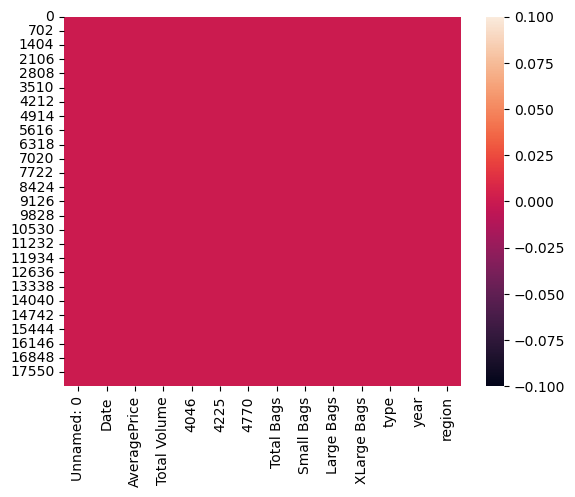

In [9]:
sns.heatmap(df.isnull())
plt.show()

We can also visualize from the above heatmap that there are no null values in the dataset.

In [10]:
#Check the counts of unique values of each column
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

0     432
7     432
1     432
11    432
9     432
8     432
10    432
6     432
5     432
4     432
3     432
2     432
41    324
34    324
35    324
36    324
37    324
38    324
39    324
40    324
47    324
42    324
43    324
44    324
45    324
46    324
32    324
48    324
49    324
50    324
33    324
26    324
31    324
30    324
12    324
13    324
14    324
15    324
16    324
17    324
18    324
19    324
20    324
21    324
22    324
23    324
24    324
25    324
27    324
28    324
29    324
51    322
52    107
Name: Unnamed: 0, dtype: int64


2015-12-27    108
2017-12-24    108
2017-12-10    108
2017-12-03    108
2017-11-26    108
             ... 
2016-11-06    108
2018-01-07    108
2017-06-18    107
2017-06-25    107
2015-12-06    107
Name: Date, Length: 169, dtype: int64


1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
3.25      1
3.12      1
2.68      1
3.03      1
3.17      1
Name: AveragePrice, Length: 259, dtype: int64


4103.97       2
352

We can see that some columns contain continuous data and some contain categorical data.

The unnamed column is irrelevant. So, we will remove that column.

In [11]:
#Drop the irrelevant column
df.drop('Unnamed: 0',axis=1,inplace=True)

In [12]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


Now, we will change the data type of the "Date" column to datetime and derive "Month" and "Day" columns from it so that we can use them later.

In [13]:
df["Date"]=pd.to_datetime(df["Date"])
df["Month"]=df["Date"].dt.month
df["Day"]=df["Date"].dt.day
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,2,4
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,1,28
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,1,21
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,1,14


Now, we have 15 columns after adding "Month" and "Day" columns to the dataset.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          18249 non-null  datetime64[ns]
 1   AveragePrice  18249 non-null  float64       
 2   Total Volume  18249 non-null  float64       
 3   4046          18249 non-null  float64       
 4   4225          18249 non-null  float64       
 5   4770          18249 non-null  float64       
 6   Total Bags    18249 non-null  float64       
 7   Small Bags    18249 non-null  float64       
 8   Large Bags    18249 non-null  float64       
 9   XLarge Bags   18249 non-null  float64       
 10  type          18249 non-null  object        
 11  year          18249 non-null  int64         
 12  region        18249 non-null  object        
 13  Month         18249 non-null  int64         
 14  Day           18249 non-null  int64         
dtypes: datetime64[ns](1), float64(9), in

We can see above that the data type of the "Date" column has been converted to datetime and "Month" and "Day" columns with integer data type have been added.

We will rename the columns "4046", "4225" and "4770" for better understanding.

In [15]:
df.rename(columns={'4046':'PLU-4046 Sold','4225':'PLU-4225 Sold','4770':'PLU-4770 Sold'},inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           18249 non-null  datetime64[ns]
 1   AveragePrice   18249 non-null  float64       
 2   Total Volume   18249 non-null  float64       
 3   PLU-4046 Sold  18249 non-null  float64       
 4   PLU-4225 Sold  18249 non-null  float64       
 5   PLU-4770 Sold  18249 non-null  float64       
 6   Total Bags     18249 non-null  float64       
 7   Small Bags     18249 non-null  float64       
 8   Large Bags     18249 non-null  float64       
 9   XLarge Bags    18249 non-null  float64       
 10  type           18249 non-null  object        
 11  year           18249 non-null  int64         
 12  region         18249 non-null  object        
 13  Month          18249 non-null  int64         
 14  Day            18249 non-null  int64         
dtypes: datetime64[ns](1

In [17]:
#Statistical summary of numerical columns
df.describe()

,AveragePrice,Total Volume,PLU-4046 Sold,PLU-4225 Sold,PLU-4770 Sold,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899,6.177215,15.662612
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938,3.534130,8.776281
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000,1.000000,1.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000,3.000000,8.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000,6.000000,16.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000,9.000000,23.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000,12.000000,31.000000


We can observe the following:

There are no missing values in the dataset.

The columns "Total Volume", "PLU-4046 Sold", "PLU-4225 Sold", "PLU-4770 Sold", "Total Bags", "Small Bags", "Large Bags" and "XLarge Bags" have right skewness as the mean is bigger than the median.

Most of the features have outliers as max is much bigger than 75% in these features.

# Data Visualization

Univariate Analysis

Let's visualize the distribution of each variable

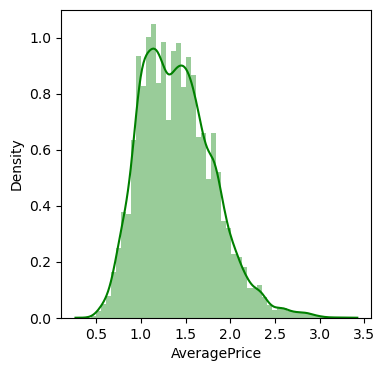

In [18]:
#Visualize the distribution of the feature "AveragePrice"
plt.figure(figsize=(4,4))
sns.distplot(df['AveragePrice'],color='green')
plt.show()

We can see that the distribution of the feature "AveragePrice" is right skewed.

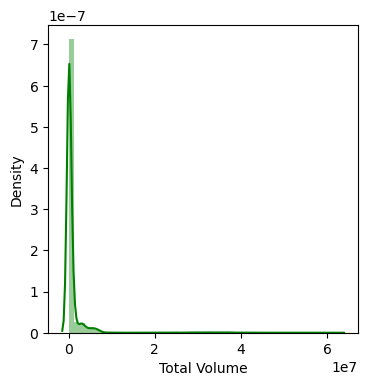

In [19]:
#Visualize the distribution of the feature "Total Volume"
plt.figure(figsize=(4,4))
sns.distplot(df['Total Volume'],color='green')
plt.show()

We can see that the distribution of the feature "Total Volume" is highly right skewed.

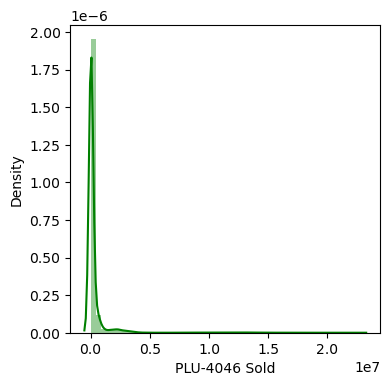

In [20]:
#Visualize the distribution of the feature "PLU-4046 Sold"
plt.figure(figsize=(4,4))
sns.distplot(df['PLU-4046 Sold'],color='green')
plt.show()

We can see that the distribution of the feature "PLU-4046 Sold" is highly right skewed.

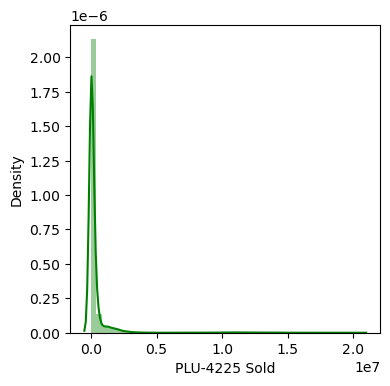

In [21]:
#Visualize the distribution of the feature "PLU-4225 Sold"
plt.figure(figsize=(4,4))
sns.distplot(df['PLU-4225 Sold'],color='green')
plt.show()

We can see that the distribution of the feature "PLU-4225 Sold" is highly right skewed.

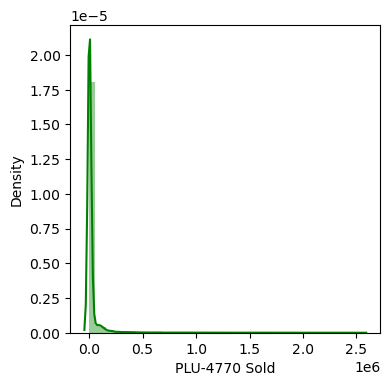

In [22]:
#Visualize the distribution of the feature "PLU-4770 Sold"
plt.figure(figsize=(4,4))
sns.distplot(df['PLU-4770 Sold'],color='green')
plt.show()

We can see that the distribution of the feature "PLU-4770 Sold" is highly right skewed.

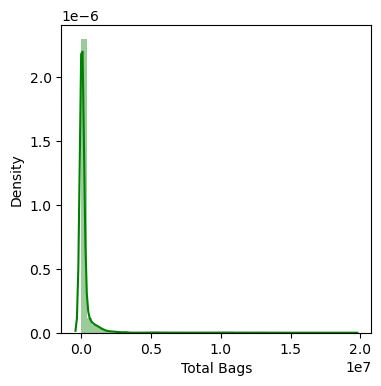

In [23]:
#Visualize the distribution of the feature "Total Bags"
plt.figure(figsize=(4,4))
sns.distplot(df['Total Bags'],color='green')
plt.show()

We can see that the distribution of the feature "Total Bags" is highly right skewed.

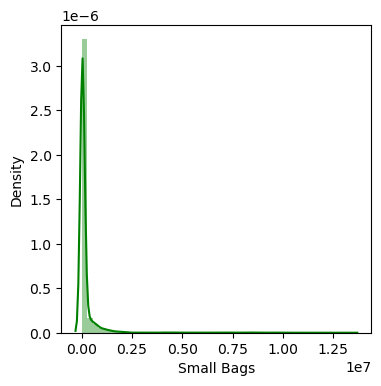

In [24]:
#Visualize the distribution of the feature "Small Bags"
plt.figure(figsize=(4,4))
sns.distplot(df['Small Bags'],color='green')
plt.show()

We can see that the distribution of the feature "Small Bags" is highly right skewed.

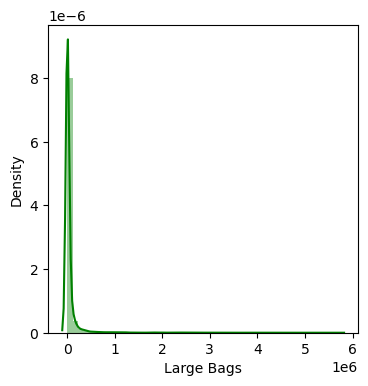

In [25]:
#Visualize the distribution of the feature "Large Bags"
plt.figure(figsize=(4,4))
sns.distplot(df['Large Bags'],color='green')
plt.show()

We can see that the distribution of the feature "Large Bags" is highly right skewed.

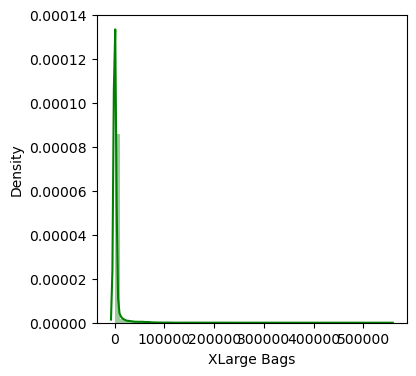

In [26]:
#Visualize the distribution of the feature "XLarge Bags"
plt.figure(figsize=(4,4))
sns.distplot(df['XLarge Bags'],color='green')
plt.show()

We can see that the distribution of the feature "XLarge Bags" is highly right skewed.

Bivariate Analysis

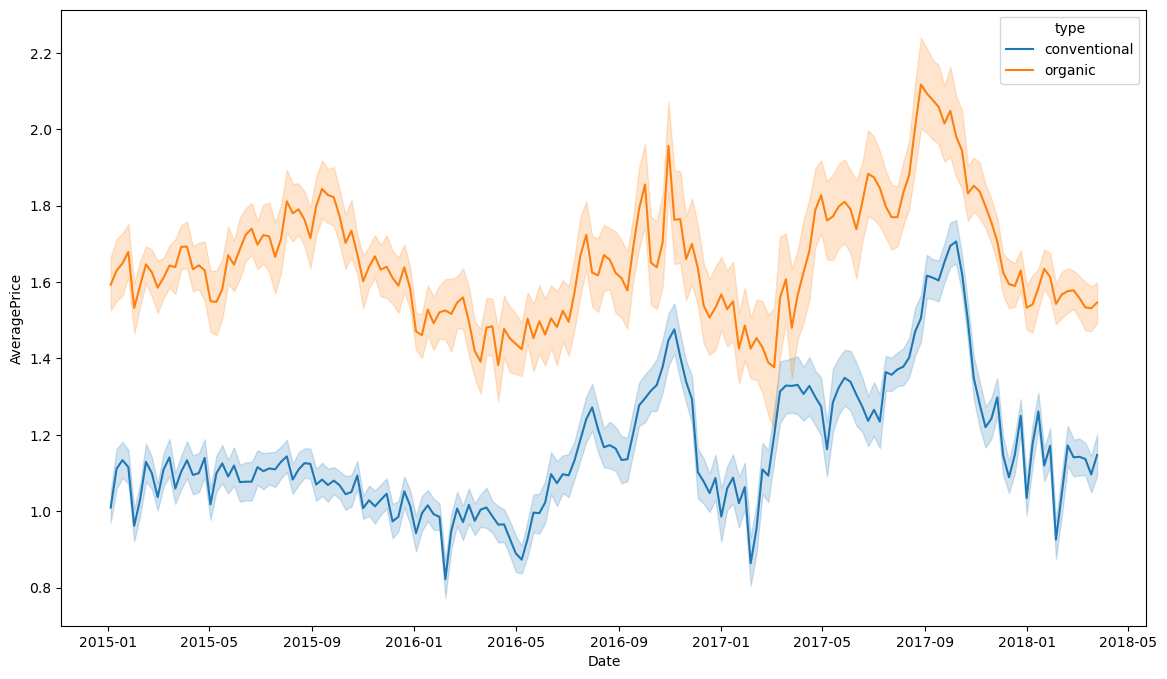

In [27]:
#The average prices of Avocadoes at different points of time
plt.figure(figsize=(14,8))
sns.lineplot(x="Date", y="AveragePrice", hue='type', data=df)
plt.show()

The above plot shows the average price of conventional and organic avocadoes at different points of time. We can observe that the price of both types of avocadoes is at its peak during Sep to Nov 2017.

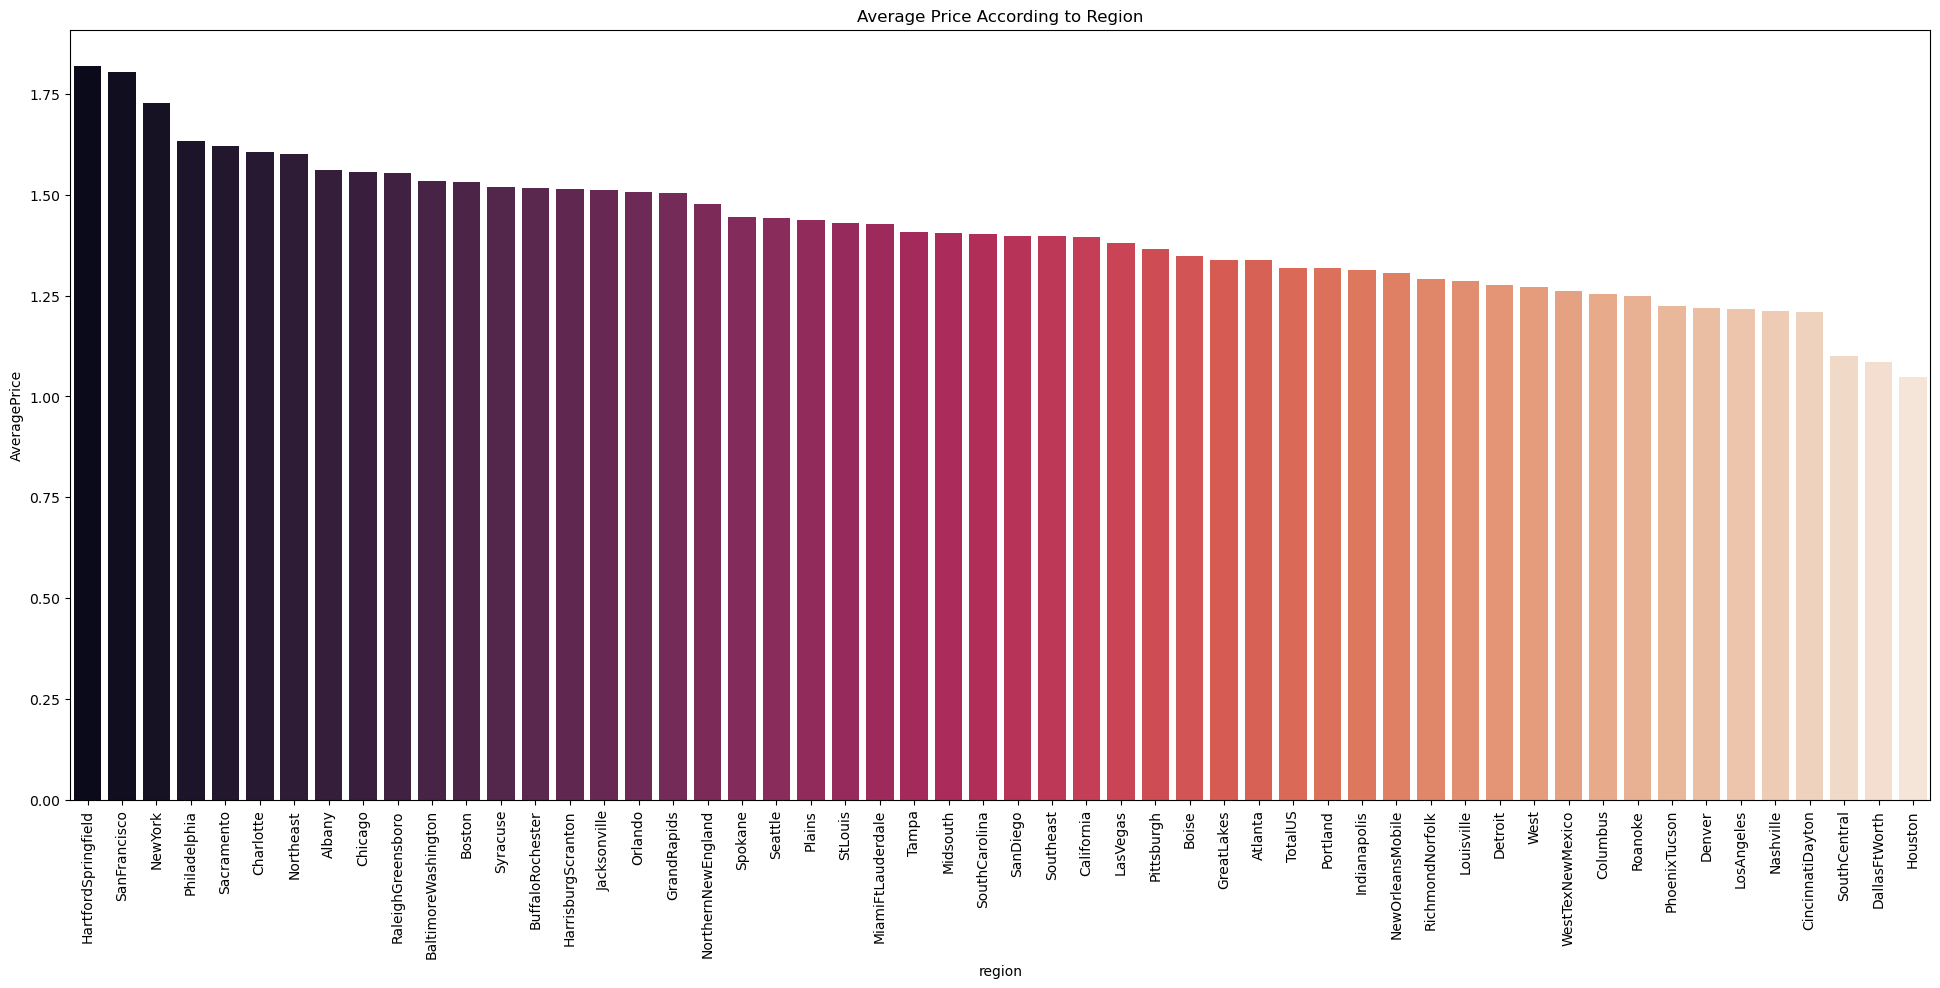

In [28]:
#Find out the average price of avocado at various regions
df_region=df.groupby('region').mean()
df_region.sort_values(by=['AveragePrice'],ascending=False,inplace=True)
plt.figure(figsize=(24,10))
sns.barplot(x=df_region.index,y=df_region['AveragePrice'],data=df_region,palette='rocket')
plt.xticks(rotation=90)
plt.title('Average Price According to Region')
plt.show()

We can observe that the average price of avocado is the highest in the region "HartfordSpringfield" and the lowest in the region "Houston".

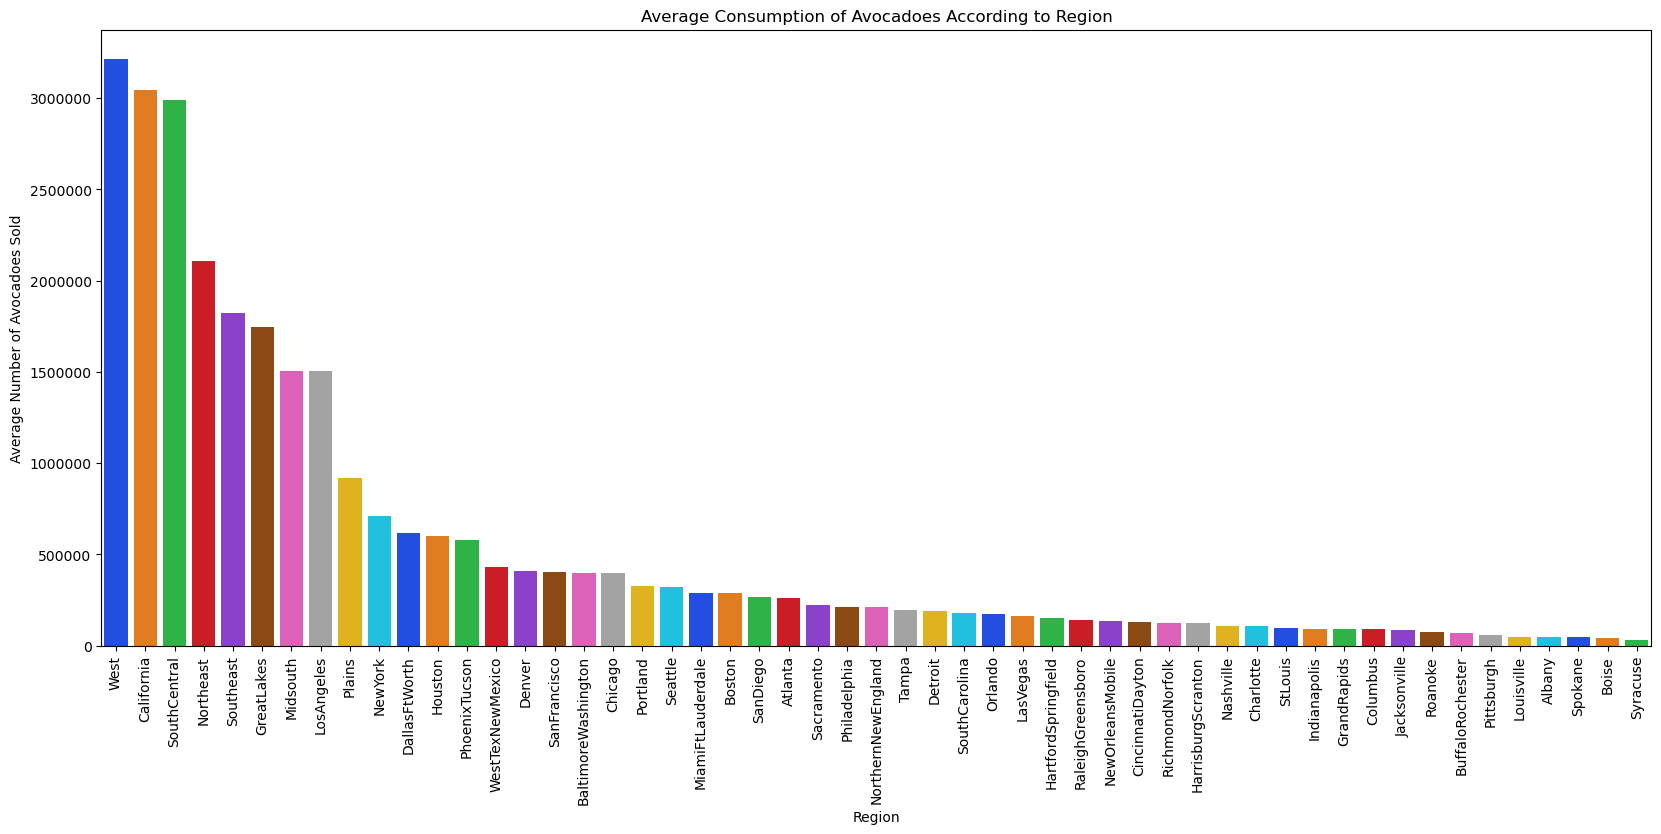

In [29]:
#Find out the average consumption of Avocadoes at various regions
df_region=df.groupby('region').mean()
df_region.drop('TotalUS',axis=0,inplace=True) #Dropping TotalUS region which contains total of all regions
df_region.sort_values(by=['Total Volume'],ascending=False,inplace=True)
plt.figure(figsize=(20,8))
sns.barplot(x=df_region.index,y=df_region['Total Volume'],data=df_region,palette='bright')
plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Number of Avocadoes Sold')
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.title('Average Consumption of Avocadoes According to Region')
plt.show()

We can observe that the average consumption of avocadoes is the highest in the region "West" and the lowest in the region "Syracuse".

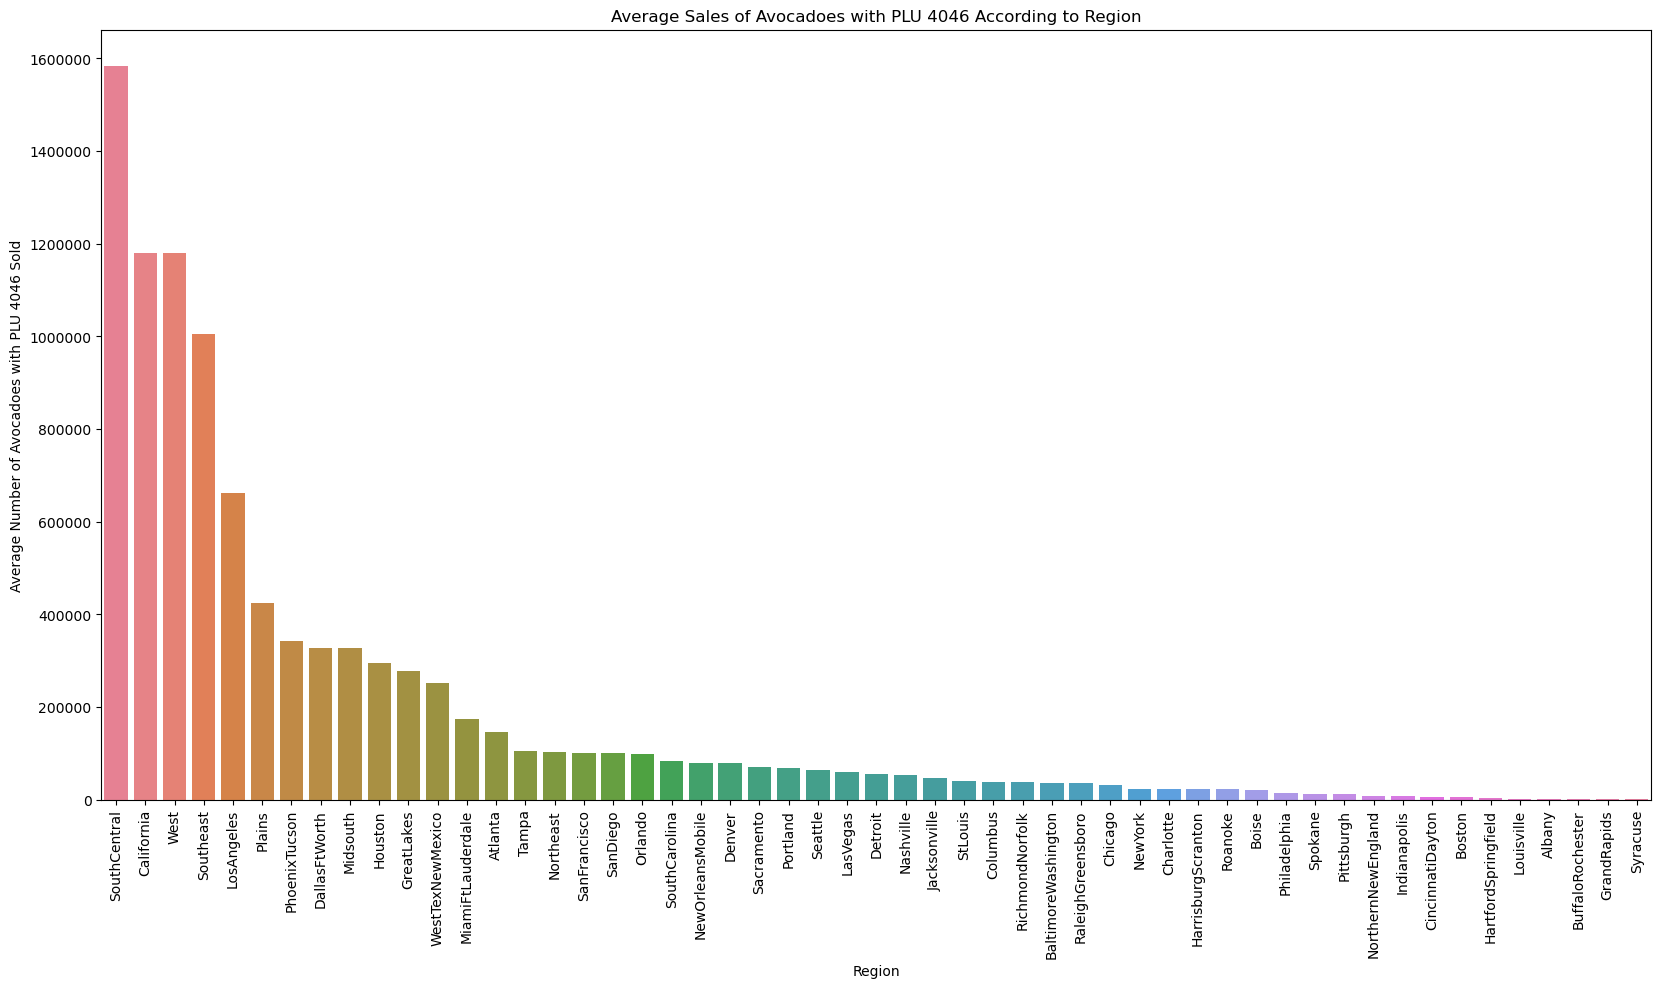

In [30]:
#Find out the average sales of Avocadoes with PLU 4046 at various regions
df_region=df.groupby('region').mean()
df_region.drop('TotalUS',axis=0,inplace=True) #Dropping TotalUS region which contains total of all regions
df_region.sort_values(by=['PLU-4046 Sold'],ascending=False,inplace=True)
plt.figure(figsize=(20,10))
sns.barplot(x=df_region.index,y=df_region['PLU-4046 Sold'],data=df_region,palette='husl')
plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Number of Avocadoes with PLU 4046 Sold')
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.title('Average Sales of Avocadoes with PLU 4046 According to Region')
plt.show()

We can observe that the average sales of Avocadoes with PLU 4046 is highest in the region "SouthCentral" and lowest in the region "Syracuse".

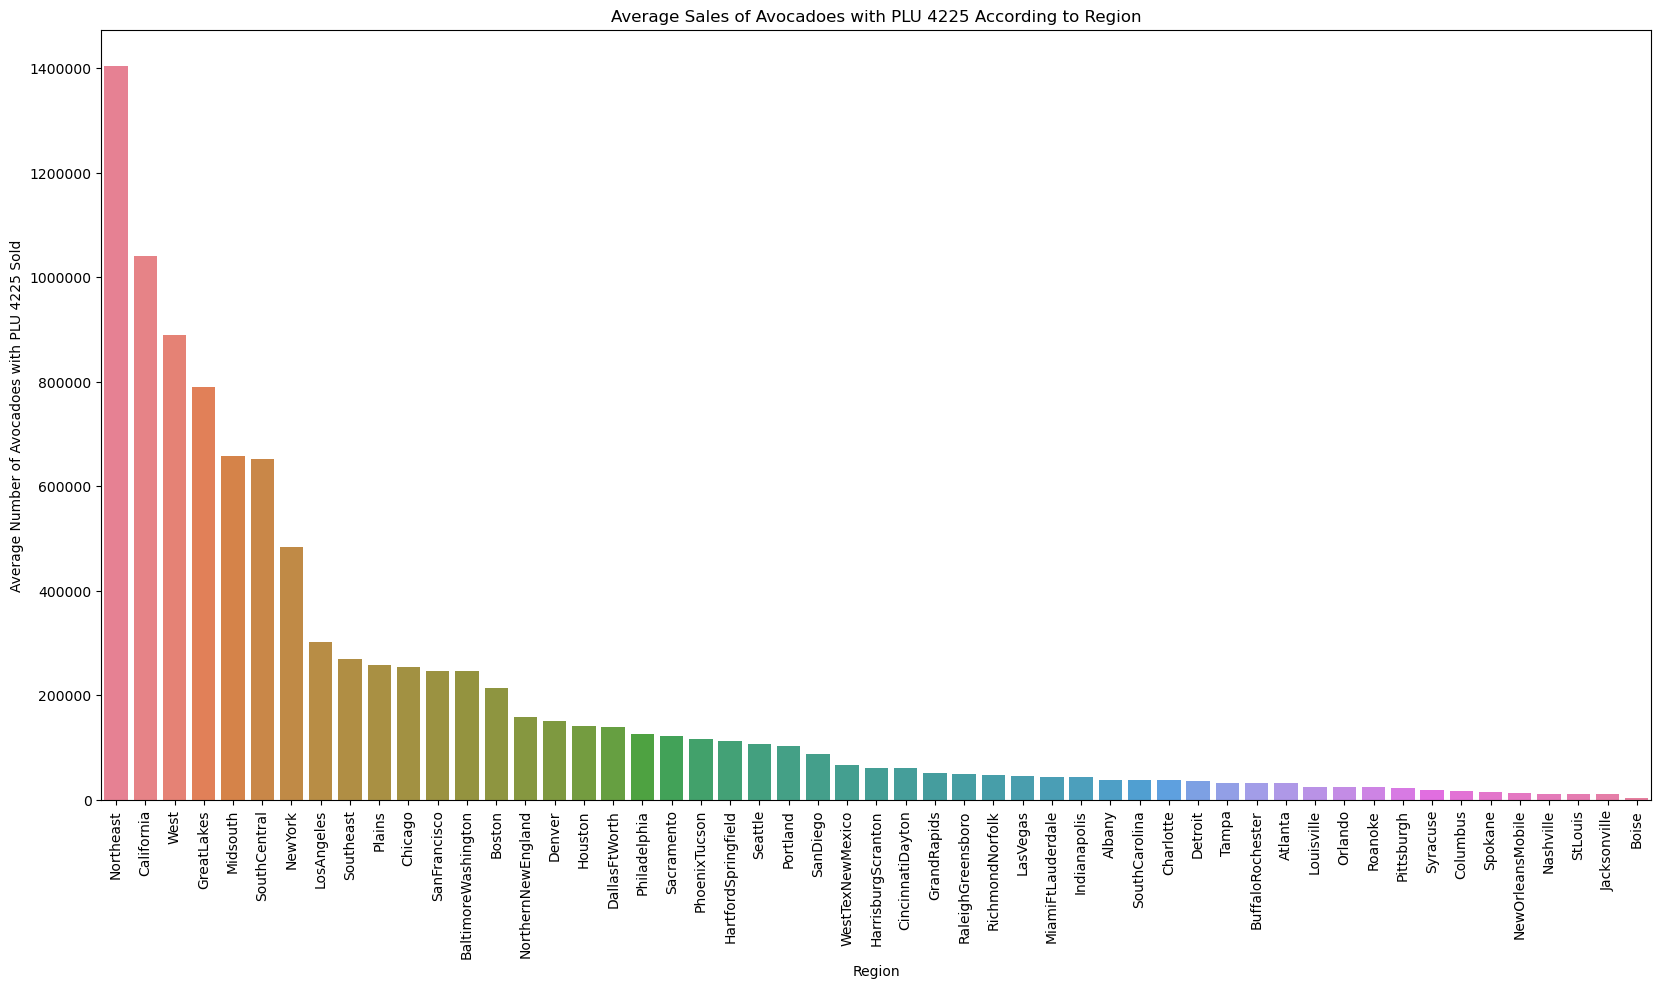

In [31]:
#Find out the average sales of Avocadoes with PLU 4225 at various regions
df_region=df.groupby('region').mean()
df_region.drop('TotalUS',axis=0,inplace=True) #Dropping TotalUS region which contains total of all regions
df_region.sort_values(by=['PLU-4225 Sold'],ascending=False,inplace=True)
plt.figure(figsize=(20,10))
sns.barplot(x=df_region.index,y=df_region['PLU-4225 Sold'],data=df_region,palette='husl')
plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Number of Avocadoes with PLU 4225 Sold')
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.title('Average Sales of Avocadoes with PLU 4225 According to Region')
plt.show()

We can observe that the average sales of Avocadoes with PLU 4225 is highest in the region "Northeast" and lowest in the region "Boise".

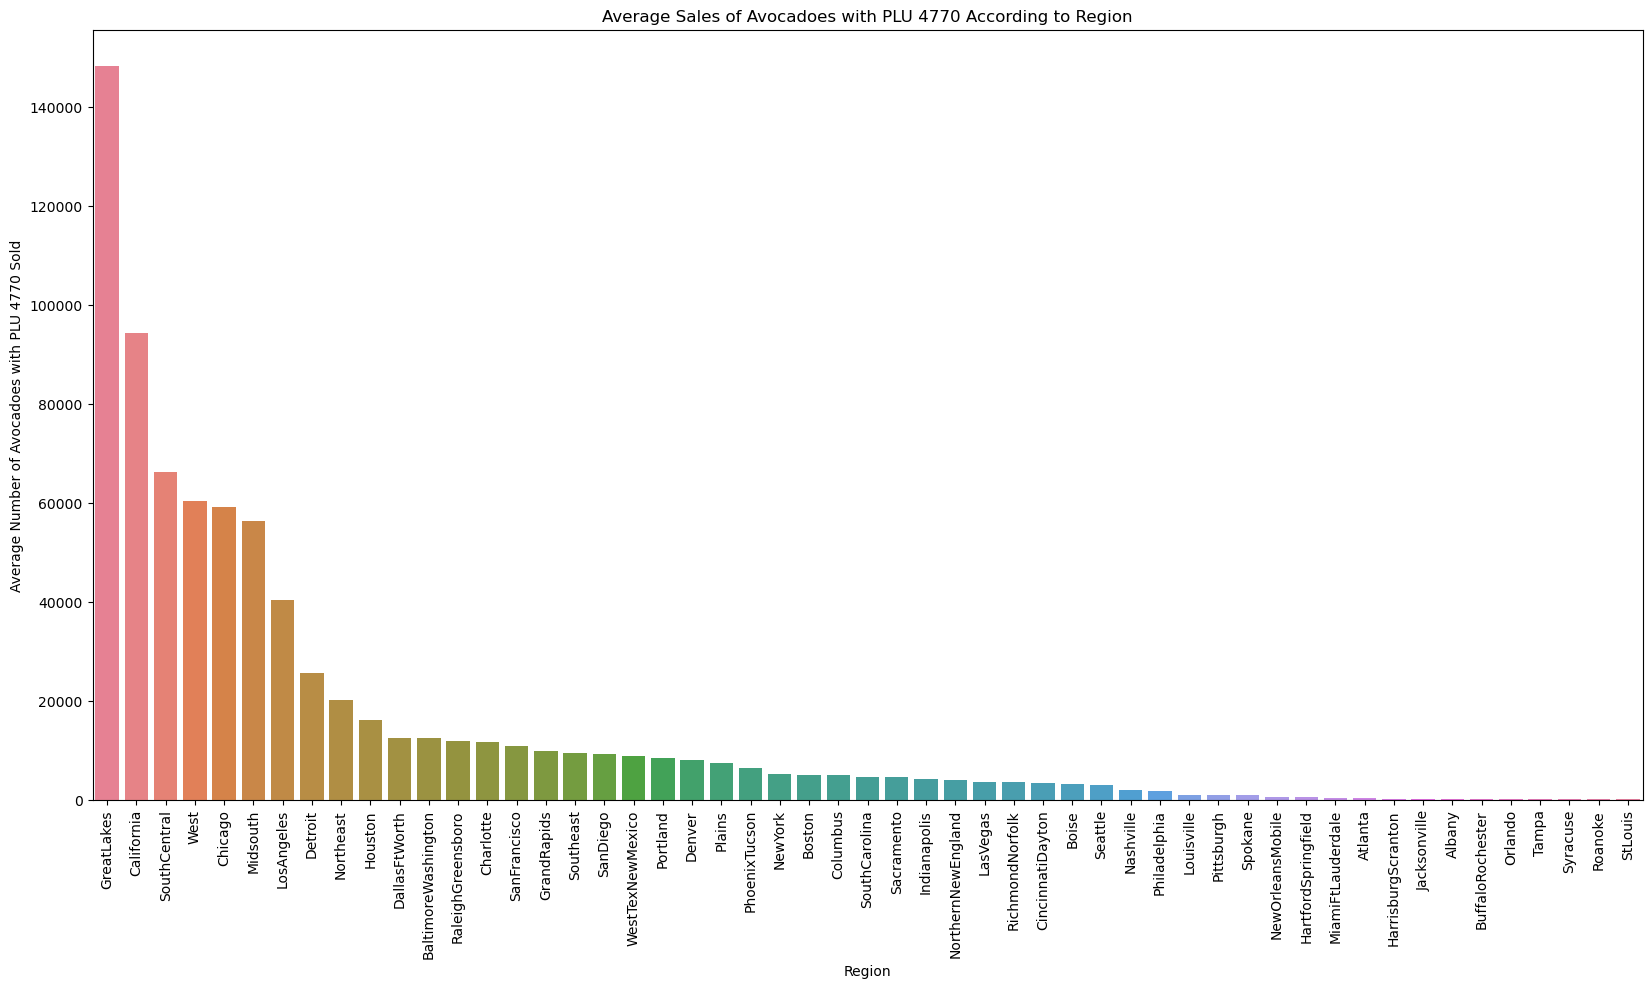

In [32]:
#Find out the average sales of Avocadoes with PLU 4770 at various regions
df_region=df.groupby('region').mean()
df_region.drop('TotalUS',axis=0,inplace=True) #Dropping TotalUS region which contains total of all regions
df_region.sort_values(by=['PLU-4770 Sold'],ascending=False,inplace=True)
plt.figure(figsize=(20,10))
sns.barplot(x=df_region.index,y=df_region['PLU-4770 Sold'],data=df_region,palette='husl')
plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Number of Avocadoes with PLU 4770 Sold')
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.title('Average Sales of Avocadoes with PLU 4770 According to Region')
plt.show()

We can observe that the average sales of Avocadoes with PLU 4225 is highest in the region "GreatLakes" and lowest in the region "StLouis".

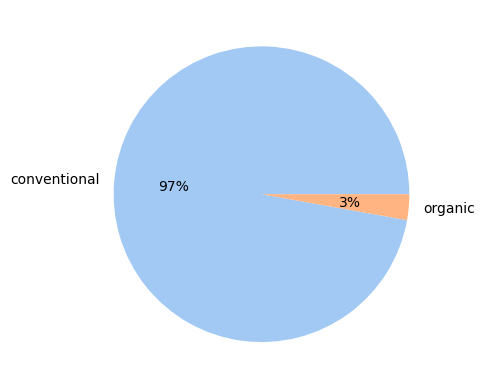

In [33]:
#Find out which type of avocado is more in demand
df_type=df.groupby('type')['Total Volume'].agg('sum')
labels=['conventional','organic']
colors=sns.color_palette('pastel')[0:5]
plt.pie(df_type, labels=labels, colors=colors, autopct='%.0f%%')
plt.show()

We can observe that organic avocadoes are very less in demand and conventional avocadoes are much higher in demand than organic ones.

We will drop the "Date" column as it is useless now.

In [34]:
#Drop the "Date" column
df.drop('Date',axis=1,inplace=True)
df

,AveragePrice,Total Volume,PLU-4046 Sold,PLU-4225 Sold,PLU-4770 Sold,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,2,4
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,1,28
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,1,21
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,1,14


Checking for Outliers

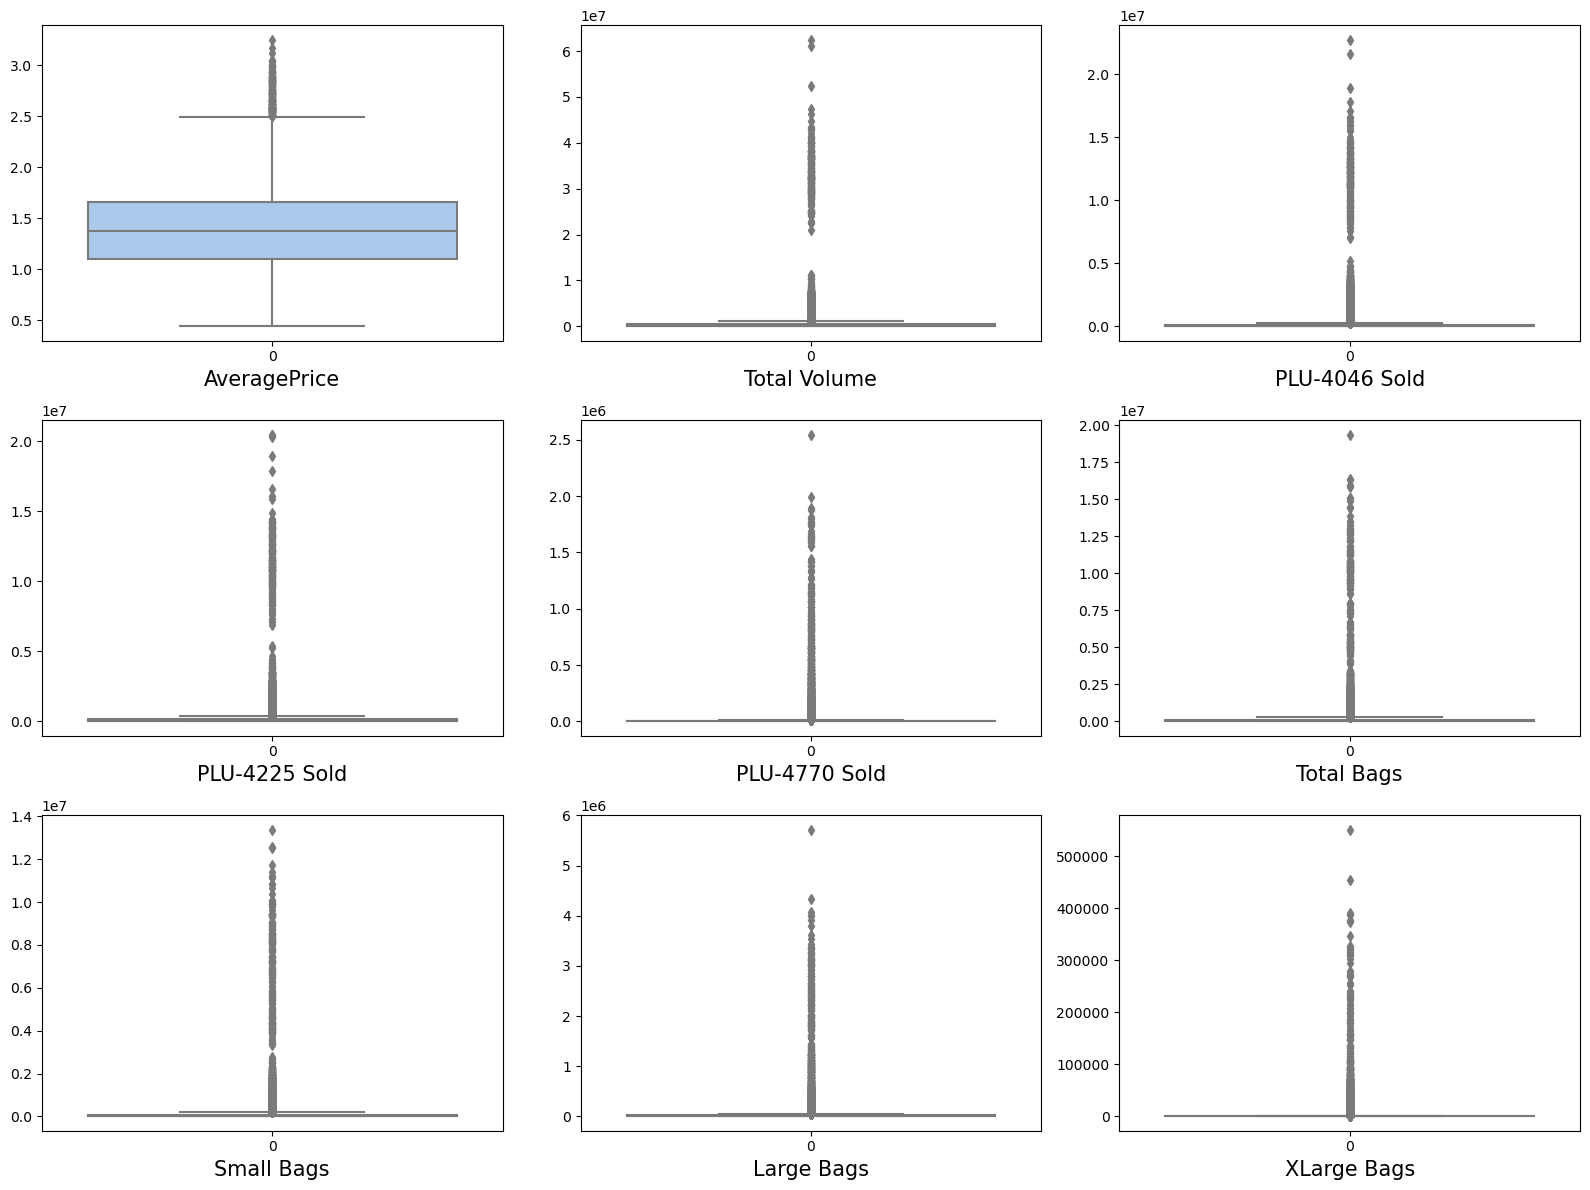

In [35]:
#Check for outliers in continuous data columns
out_columns=['AveragePrice','Total Volume','PLU-4046 Sold','PLU-4225 Sold','PLU-4770 Sold','Total Bags','Small Bags','Large Bags','XLarge Bags']
plt.figure(figsize=(16,12),facecolor="white")
plotnumber=1
for col in out_columns:
    ax=plt.subplot(3,3,plotnumber)
    sns.boxplot(df[col],palette="pastel")
    plt.xlabel(col,fontsize=15)
    plt.yticks(rotation=0,fontsize=10)
    plotnumber+=1
plt.tight_layout()

We can observe that there are a lot of outliers in all the columns. We will remove these outliers from the columns using Z-Score technique.

In [36]:
#Remove outliers
from scipy.stats import zscore
z=np.abs(zscore(df[out_columns]))
df1=df[(z<3).all(axis=1)]

In [37]:
df1.shape

(17651, 14)

In [38]:
print("Data loss percentage - ",((df.shape[0]-df1.shape[0])/df.shape[0])*100)

Data loss percentage -  3.276891884486821


The data loss percentage is 3.27% which is less than 10% and hence acceptable.

Encoding Categorical Columns

In [39]:
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
df1['type']=OE.fit_transform(df1['type'].values.reshape(-1,1))
df1['region']=OE.fit_transform(df1['region'].values.reshape(-1,1))
df1

,AveragePrice,Total Volume,PLU-4046 Sold,PLU-4225 Sold,PLU-4770 Sold,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0.0,2015,0.0,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0.0,2015,0.0,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0.0,2015,0.0,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0.0,2015,0.0,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0.0,2015,0.0,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1.0,2018,53.0,2,4
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1.0,2018,53.0,1,28
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1.0,2018,53.0,1,21
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1.0,2018,53.0,1,14


Checking for Skewness

In [40]:
df1.skew()

AveragePrice     0.377432
Total Volume     3.767138
PLU-4046 Sold    4.909848
PLU-4225 Sold    4.455745
PLU-4770 Sold    5.117170
Total Bags       4.066771
Small Bags       4.222706
Large Bags       5.053434
XLarge Bags      6.135607
type            -0.037741
year             0.229976
region           0.012798
Month            0.107408
Day              0.011778
dtype: float64

We can see that the features "Total Volume", "PLU-4046 Sold", "PLU-4225 Sold", "PLU-4770 Sold", "Total Bags", "Small Bags", "Large Bags" and "XLarge Bags" have skewness. We will remove skewness from these features using Yeo-Johnson transformation method.

In [41]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method='yeo-johnson')
df1['Total Volume']=pt.fit_transform(df1[['Total Volume']])
df1['PLU-4046 Sold']=pt.fit_transform(df1[['PLU-4046 Sold']])
df1['PLU-4225 Sold']=pt.fit_transform(df1[['PLU-4225 Sold']])
df1['PLU-4770 Sold']=pt.fit_transform(df1[['PLU-4770 Sold']])
df1['Total Bags']=pt.fit_transform(df1[['Total Bags']])
df1['Small Bags']=pt.fit_transform(df1[['Small Bags']])
df1['Large Bags']=pt.fit_transform(df1[['Large Bags']])
df1['XLarge Bags']=pt.fit_transform(df1[['XLarge Bags']])

In [42]:
#Check skewness again
df1.skew()

AveragePrice     0.377432
Total Volume    -0.008642
PLU-4046 Sold   -0.039282
PLU-4225 Sold   -0.044675
PLU-4770 Sold    0.024168
Total Bags      -0.022204
Small Bags      -0.024405
Large Bags      -0.110913
XLarge Bags      0.853758
type            -0.037741
year             0.229976
region           0.012798
Month            0.107408
Day              0.011778
dtype: float64

Now, we can see that the skewness has been reduced in all the features.

In [43]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17651 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AveragePrice   17651 non-null  float64
 1   Total Volume   17651 non-null  float64
 2   PLU-4046 Sold  17651 non-null  float64
 3   PLU-4225 Sold  17651 non-null  float64
 4   PLU-4770 Sold  17651 non-null  float64
 5   Total Bags     17651 non-null  float64
 6   Small Bags     17651 non-null  float64
 7   Large Bags     17651 non-null  float64
 8   XLarge Bags    17651 non-null  float64
 9   type           17651 non-null  float64
 10  year           17651 non-null  int64  
 11  region         17651 non-null  float64
 12  Month          17651 non-null  int64  
 13  Day            17651 non-null  int64  
dtypes: float64(11), int64(3)
memory usage: 2.0 MB


We can observe that after encoding, the data type of categorical features have been converted from object to float.

In [44]:
#Statistical summary of numerical columns
df1.describe()

,AveragePrice,Total Volume,PLU-4046 Sold,PLU-4225 Sold,PLU-4770 Sold,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
count,17651.000000,1.765100e+04,1.765100e+04,1.765100e+04,1.765100e+04,1.765100e+04,1.765100e+04,1.765100e+04,1.765100e+04,17651.000000,17651.000000,17651.000000,17651.000000,17651.000000
mean,1.405363,1.674612e-16,6.440816e-18,-2.189877e-16,1.288163e-17,3.864489e-17,1.867837e-16,5.796734e-17,-8.373060e-17,0.509433,2016.137669,26.103110,6.178347,15.685400
std,0.385793,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,0.499925,0.940239,15.396005,3.539935,8.775959
min,0.440000,-2.992375e+00,-2.285118e+00,-2.583902e+00,-1.228986e+00,-3.515251e+00,-2.714256e+00,-1.624482e+00,-6.779191e-01,0.000000,2015.000000,0.000000,1.000000,1.000000
25%,1.110000,-8.941640e-01,-7.224171e-01,-7.264133e-01,-1.228986e+00,-7.807219e-01,-7.804145e-01,-7.385176e-01,-6.779191e-01,0.000000,2015.000000,13.000000,3.000000,8.000000
50%,1.380000,1.292258e-01,-5.631802e-02,6.417382e-02,8.028069e-02,1.422147e-01,9.758440e-02,7.274404e-02,-6.779191e-01,1.000000,2016.000000,26.000000,6.000000,16.000000
75%,1.660000,7.627411e-01,8.015672e-01,7.229399e-01,9.223906e-01,6.474624e-01,6.502158e-01,7.537507e-01,1.278381e+00,1.000000,2017.000000,39.000000,9.000000,23.000000
max,2.610000,2.226585e+00,2.300196e+00,2.498293e+00,1.889163e+00,2.590538e+00,2.706553e+00,2.352115e+00,1.717145e+00,1.000000,2018.000000,53.000000,12.000000,31.000000


We can observe that there are no missing values in any of the columns.

The skewness in most of the columns have been reduced as the mean is almost equal to the median.

In [45]:
#Check correlation between features and label
cor=df1.corr()
cor

,AveragePrice,Total Volume,PLU-4046 Sold,PLU-4225 Sold,PLU-4770 Sold,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
AveragePrice,1.000000,-0.580126,-0.554612,-0.453664,-0.493607,-0.564105,-0.489430,-0.484384,-0.393086,0.613150,0.091704,-0.003242,0.149502,0.026819
Total Volume,-0.580126,1.000000,0.889248,0.924664,0.818545,0.941082,0.905795,0.682569,0.629882,-0.799821,0.080706,0.068983,-0.021861,-0.006430
PLU-4046 Sold,-0.554612,0.889248,1.000000,0.764456,0.737191,0.800798,0.779462,0.603598,0.574335,-0.725000,0.001350,0.162069,-0.021731,-0.005191
PLU-4225 Sold,-0.453664,0.924664,0.764456,1.000000,0.797186,0.820596,0.786441,0.616089,0.584748,-0.747349,-0.001524,0.033926,-0.021967,-0.006289
PLU-4770 Sold,-0.493607,0.818545,0.737191,0.797186,1.000000,0.761056,0.753593,0.547691,0.616930,-0.780137,-0.049934,0.041295,-0.013533,0.001251
Total Bags,-0.564105,0.941082,0.800798,0.820596,0.761056,1.000000,0.949975,0.729681,0.613741,-0.724752,0.214666,0.071460,-0.009209,-0.003164
Small Bags,-0.489430,0.905795,0.779462,0.786441,0.753593,0.949975,1.000000,0.566610,0.604123,-0.719063,0.190267,0.057312,-0.004761,-0.000222
Large Bags,-0.484384,0.682569,0.603598,0.616089,0.547691,0.729681,0.566610,1.000000,0.451305,-0.498894,0.191742,0.089954,-0.014694,-0.000130
XLarge Bags,-0.393086,0.629882,0.574335,0.584748,0.616930,0.613741,0.604123,0.451305,1.000000,-0.665473,0.161582,-0.019668,0.020729,0.010752
type,0.613150,-0.799821,-0.725000,-0.747349,-0.780137,-0.724752,-0.719063,-0.498894,-0.665473,1.000000,0.003867,0.018409,-0.009499,-0.002287


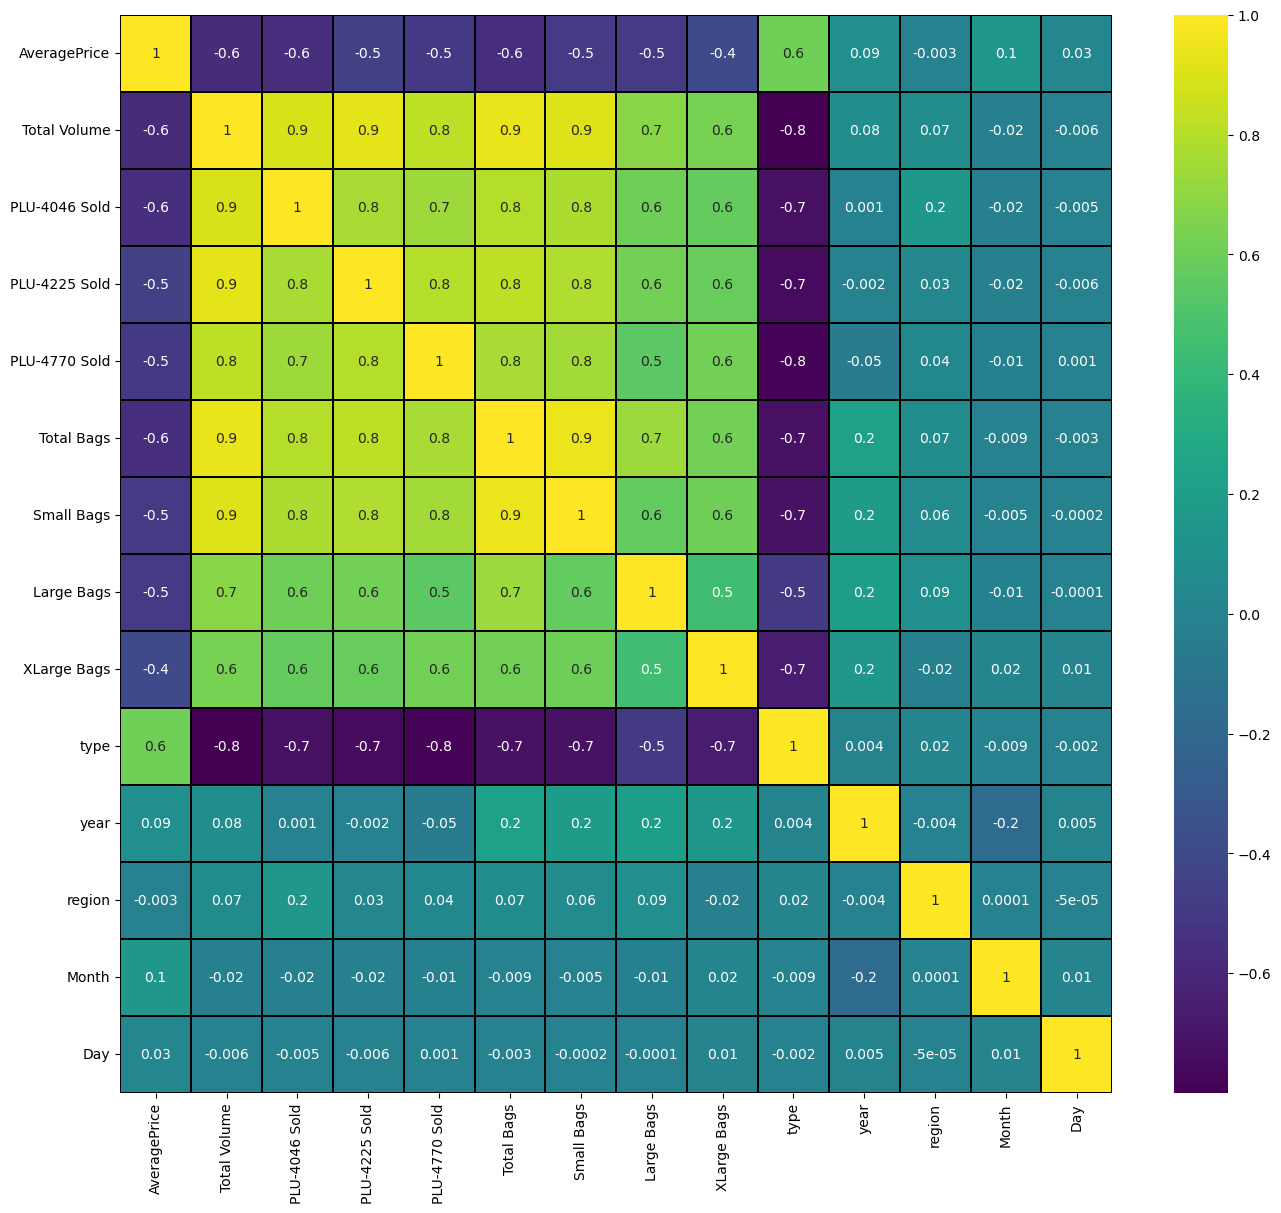

In [46]:
#Visualize the correlation between features and label
plt.figure(figsize=(16,14))
sns.heatmap(df1.corr(),linewidths=0.1,fmt='.1g',linecolor='black',annot=True,cmap='viridis')
plt.yticks(rotation=0)
plt.show()

We can observe the following:

All the features have almost no correlation with the lable "region".

Most of the features are highly correlated with each other.

In [47]:
#Correlation between features and label
cor['region'].sort_values(ascending=False)

region           1.000000
PLU-4046 Sold    0.162069
Large Bags       0.089954
Total Bags       0.071460
Total Volume     0.068983
Small Bags       0.057312
PLU-4770 Sold    0.041295
PLU-4225 Sold    0.033926
type             0.018409
Month            0.000119
Day             -0.000046
AveragePrice    -0.003242
year            -0.004417
XLarge Bags     -0.019668
Name: region, dtype: float64

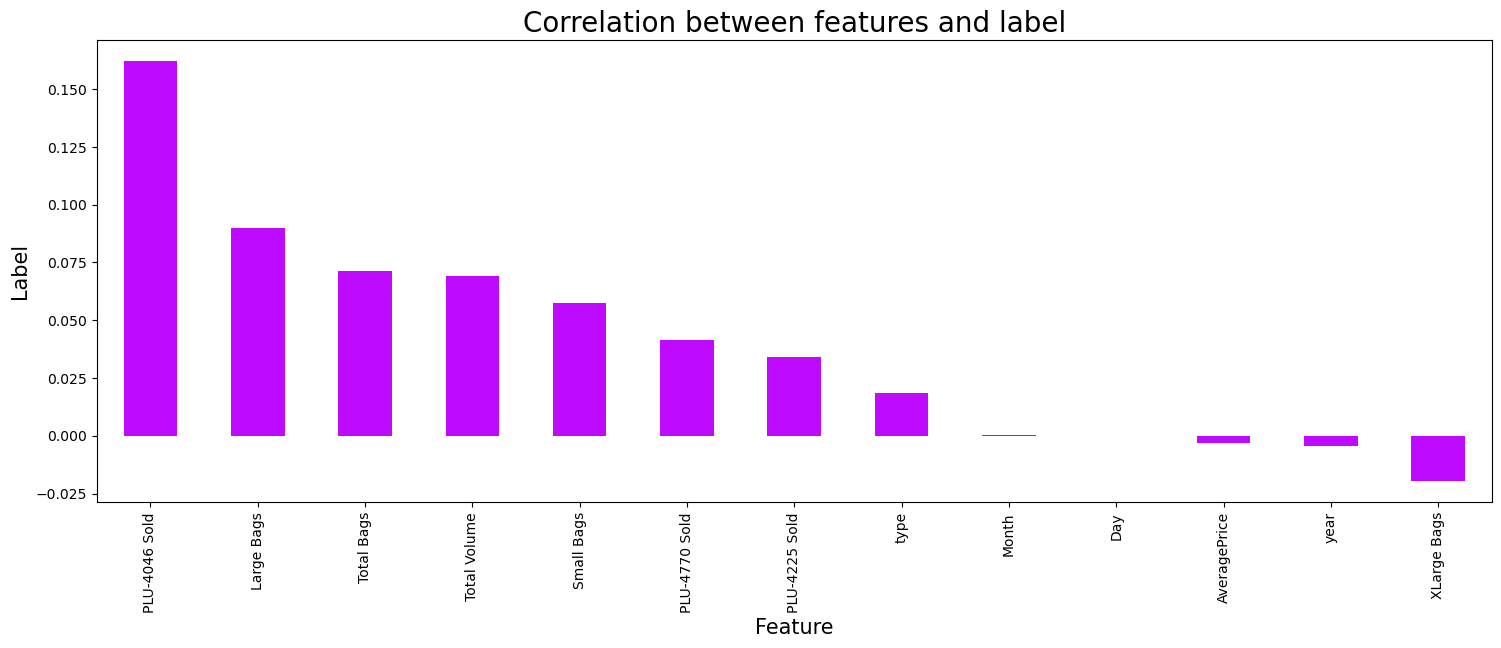

In [48]:
#Visualize the correlation between features and label
plt.figure(figsize=(18,6))
df1.corr()['region'].sort_values(ascending=False).drop(['region']).plot(kind='bar',color='#BE0AFF')
plt.xlabel('Feature',fontsize=15)
plt.ylabel('Label',fontsize=15)
plt.title('Correlation between features and label',fontsize=20)
plt.show()

We can observe that the features "Month" and "Day" have no correlation with the label "region".

Separating features and label

In [49]:
x=df1.drop("region",axis=1)
y=df1["region"]

Feature Scaling

In [50]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,AveragePrice,Total Volume,PLU-4046 Sold,PLU-4225 Sold,PLU-4770 Sold,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,Month,Day
0,-0.195352,-0.075324,-0.657421,0.351430,-0.222566,-0.537507,-0.347421,-0.781153,-0.677919,-1.019047,-1.210013,1.644612,1.289309
1,-0.143510,-0.147497,-0.777179,0.269513,-0.175223,-0.498128,-0.311322,-0.771198,-0.677919,-1.019047,-1.210013,1.644612,0.491652
2,-1.232207,0.205556,-0.731776,0.649333,0.023923,-0.566369,-0.374453,-0.758523,-0.677919,-1.019047,-1.210013,1.644612,-0.306004
3,-0.843387,0.019655,-0.632592,0.468799,-0.121164,-0.713068,-0.510991,-0.699123,-0.677919,-1.019047,-1.210013,1.644612,-1.103660
4,-0.324959,-0.180674,-0.684504,0.262126,-0.110491,-0.686312,-0.490534,-0.607027,-0.677919,-1.019047,-1.210013,1.362113,1.517211
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17646,0.582289,-0.678214,-0.462066,-0.926028,-1.228986,-0.340422,-0.175753,-0.412401,-0.677919,0.981309,1.980756,-1.180379,-1.331562
17647,0.789660,-0.771326,-0.618019,-0.670600,-1.228986,-0.509513,-0.331971,-0.484991,-0.677919,0.981309,1.980756,-1.462878,1.403260
17648,1.204402,-0.775274,-0.617966,-0.778893,0.445710,-0.503366,-0.313756,-0.950743,-0.677919,0.981309,1.980756,-1.462878,0.605603
17649,1.359930,-0.701797,-0.547011,-0.716371,0.445399,-0.434176,-0.250408,-0.916068,-0.677919,0.981309,1.980756,-1.462878,-0.192053


Now, all the features have been scaled to overcome the issue of biasness in the model.

Checking Variance Inflation Factor (VIF)

In [51]:
#Find out Variance Inflation Factor of each feature
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF Values"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"]=x.columns
vif

,VIF Values,Features
0,2.285036,AveragePrice
1,54.881098,Total Volume
2,6.915890,PLU-4046 Sold
3,12.459991,PLU-4225 Sold
4,3.967551,PLU-4770 Sold
5,36.069098,Total Bags
6,17.304272,Small Bags
7,3.478073,Large Bags
8,2.047554,XLarge Bags
9,4.205576,type


We can see that the features "Total Volume", "PLU-4225 Sold", "Total Bags" and "Small Bags" have VIF values greater than 10 which indicates that there is multicollinearity problem with the features. So, we will remove the feature "Total Volume" which has the highest VIF value first and then see if the multicollinearity problem still exists.

In [52]:
#Copy x into a new dataframe and drop the column
x1=x.copy()
x1.drop("Total Volume",axis=1,inplace=True)

In [53]:
#Check the VIF values again
vif=pd.DataFrame()
vif["VIF Values"]=[variance_inflation_factor(x1.values,i) for i in range(len(x1.columns))]
vif["Features"]=x1.columns
vif

,VIF Values,Features
0,2.227192,AveragePrice
1,3.593664,PLU-4046 Sold
2,4.678803,PLU-4225 Sold
3,3.957870,PLU-4770 Sold
4,26.871588,Total Bags
5,17.293065,Small Bags
6,3.424816,Large Bags
7,2.035720,XLarge Bags
8,4.074667,type
9,1.534812,year


Now, the features "Total Bags" and "Small Bags" have VIF values greater than 10. We will remove the feature "Total Bags".

In [54]:
#Drop the column
x1.drop("Total Bags",axis=1,inplace=True)

In [55]:
#Check the VIF values again
vif=pd.DataFrame()
vif["VIF Values"]=[variance_inflation_factor(x1.values,i) for i in range(len(x1.columns))]
vif["Features"]=x1.columns
vif

,VIF Values,Features
0,2.037477,AveragePrice
1,3.586345,PLU-4046 Sold
2,4.372330,PLU-4225 Sold
3,3.957257,PLU-4770 Sold
4,4.192588,Small Bags
5,2.078512,Large Bags
6,2.035453,XLarge Bags
7,4.043740,type
8,1.464268,year
9,1.127977,Month


Now, none of the columns have VIF values greater than 10. Hence the problem of multicollinearity has been solved and we can proceed further.

In [56]:
#Copy x1 into the original dataframe x
x=x1.copy()

In [57]:
y.value_counts()

0.0     338
16.0    338
49.0    338
44.0    338
39.0    338
38.0    338
35.0    338
34.0    338
32.0    338
30.0    338
26.0    338
23.0    338
19.0    338
18.0    338
27.0    338
8.0     338
2.0     338
13.0    338
12.0    338
11.0    338
4.0     338
5.0     338
10.0    338
9.0     338
20.0    337
1.0     337
28.0    337
33.0    336
41.0    336
40.0    336
14.0    336
50.0    336
31.0    335
24.0    335
25.0    333
48.0    333
21.0    333
53.0    332
7.0     332
22.0    331
17.0    331
36.0    330
3.0     329
37.0    328
47.0    328
43.0    326
29.0    325
46.0    307
42.0    301
45.0    292
6.0     290
15.0    272
52.0    256
51.0    169
Name: region, dtype: int64

# Model Building

Finding the best random state

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    pred=LR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu,"at random state",maxRS)

Best accuracy is  0.5052870090634441 at random state 74


Creating train test split

In [60]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=maxRS)

Importing the necessary modules

In [61]:
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [62]:
#Logistic Regression
LR=LogisticRegression()
LR.fit(x_train,y_train)
predLR=LR.predict(x_test)
print(accuracy_score(y_test,predLR))
print(confusion_matrix(y_test,predLR))
print(classification_report(y_test,predLR))

0.5052870090634441
[[51  0  0 ...  0  0  0]
 [ 0 41  0 ...  0  0  0]
 [ 0  0 56 ...  0  0  7]
 ...
 [ 0  0  0 ... 45  2  0]
 [ 0  0  0 ...  1 71  0]
 [ 0  9  0 ...  0  0  7]]
              precision    recall  f1-score   support

         0.0       0.45      0.64      0.53        80
         1.0       0.26      0.33      0.29       123
         2.0       0.57      0.57      0.57        99
         3.0       0.51      0.42      0.46       105
         4.0       0.47      0.50      0.49       105
         5.0       0.57      0.44      0.50       107
         6.0       0.83      0.88      0.85        81
         7.0       0.69      0.71      0.70       104
         8.0       0.63      0.79      0.70        98
         9.0       0.47      0.72      0.57       101
        10.0       0.45      0.44      0.44        89
        11.0       0.47      0.39      0.42       106
        12.0       0.43      0.50      0.46        94
        13.0       0.27      0.29      0.28        97
        14.0  

In [63]:
#XGB Classifier
XGB=XGBClassifier()
XGB.fit(x_train,y_train)
predXGB=XGB.predict(x_test)
print(accuracy_score(y_test,predXGB))
print(confusion_matrix(y_test,predXGB))
print(classification_report(y_test,predXGB))

0.883119335347432
[[73  0  0 ...  0  0  0]
 [ 0 88  0 ...  0  0  0]
 [ 0  0 95 ...  0  0  0]
 ...
 [ 0  0  0 ... 47  0  0]
 [ 0  0  0 ...  0 82  0]
 [ 0  0  0 ...  0  0 83]]
              precision    recall  f1-score   support

         0.0       0.85      0.91      0.88        80
         1.0       0.84      0.72      0.77       123
         2.0       0.96      0.96      0.96        99
         3.0       0.89      0.80      0.84       105
         4.0       0.96      0.95      0.96       105
         5.0       0.87      0.91      0.89       107
         6.0       0.99      0.99      0.99        81
         7.0       0.94      0.91      0.93       104
         8.0       0.95      0.95      0.95        98
         9.0       0.85      0.87      0.86       101
        10.0       0.71      0.87      0.78        89
        11.0       0.93      0.88      0.90       106
        12.0       0.94      0.93      0.93        94
        13.0       0.83      0.85      0.84        97
        14.0   

In [64]:
#Decision Tree Classifier
DTC=DecisionTreeClassifier()
DTC.fit(x_train,y_train)
predDTC=DTC.predict(x_test)
print(accuracy_score(y_test,predDTC))
print(confusion_matrix(y_test,predDTC))
print(classification_report(y_test,predDTC))

0.7849320241691843
[[65  0  0 ...  0  0  0]
 [ 0 80  0 ...  0  0  4]
 [ 0  0 92 ...  0  0  1]
 ...
 [ 0  0  0 ... 47  0  0]
 [ 0  0  0 ...  0 80  0]
 [ 0  0  0 ...  0  0 74]]
              precision    recall  f1-score   support

         0.0       0.77      0.81      0.79        80
         1.0       0.78      0.65      0.71       123
         2.0       0.89      0.93      0.91        99
         3.0       0.85      0.79      0.82       105
         4.0       0.87      0.83      0.85       105
         5.0       0.74      0.70      0.72       107
         6.0       0.91      0.95      0.93        81
         7.0       0.83      0.78      0.80       104
         8.0       0.92      0.91      0.91        98
         9.0       0.82      0.81      0.82       101
        10.0       0.63      0.72      0.67        89
        11.0       0.88      0.86      0.87       106
        12.0       0.85      0.79      0.82        94
        13.0       0.69      0.79      0.74        97
        14.0  

In [65]:
#Support Vector Machine Classifier
svc=SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.7705815709969789
[[75  0  0 ...  0  0  0]
 [ 0 52  0 ...  0  0  0]
 [ 0  0 92 ...  0  0  0]
 ...
 [ 0  0  0 ... 47  0  0]
 [ 0  0  0 ...  0 80  0]
 [ 0  0  0 ...  0  0 56]]
              precision    recall  f1-score   support

         0.0       0.60      0.94      0.74        80
         1.0       0.65      0.42      0.51       123
         2.0       0.93      0.93      0.93        99
         3.0       0.87      0.65      0.74       105
         4.0       0.90      0.77      0.83       105
         5.0       0.84      0.64      0.73       107
         6.0       0.97      0.96      0.97        81
         7.0       0.85      0.74      0.79       104
         8.0       0.96      0.97      0.96        98
         9.0       0.69      0.78      0.73       101
        10.0       0.49      0.76      0.60        89
        11.0       0.80      0.75      0.77       106
        12.0       0.89      0.95      0.92        94
        13.0       0.52      0.65      0.58        97
        14.0  

In [66]:
#KNeighbors Classifier
KNN=KNeighborsClassifier()
KNN.fit(x_train,y_train)
predKNN=KNN.predict(x_test)
print(accuracy_score(y_test,predKNN))
print(confusion_matrix(y_test,predKNN))
print(classification_report(y_test,predKNN))

0.610083081570997
[[72  0  0 ...  0  0  0]
 [ 0 55  0 ...  0  0  0]
 [ 0  0 87 ...  0  0  0]
 ...
 [ 0  0  0 ... 47  0  0]
 [ 0  0  0 ...  1 64  0]
 [ 0  5  1 ...  0  0 47]]
              precision    recall  f1-score   support

         0.0       0.49      0.90      0.63        80
         1.0       0.39      0.45      0.42       123
         2.0       0.64      0.88      0.74        99
         3.0       0.67      0.69      0.68       105
         4.0       0.67      0.69      0.68       105
         5.0       0.43      0.47      0.45       107
         6.0       0.75      0.79      0.77        81
         7.0       0.55      0.71      0.62       104
         8.0       0.81      0.86      0.83        98
         9.0       0.39      0.61      0.48       101
        10.0       0.26      0.48      0.33        89
        11.0       0.62      0.77      0.69       106
        12.0       0.83      0.78      0.80        94
        13.0       0.38      0.38      0.38        97
        14.0   

In [67]:
#Random Forest Classfier
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC=RFC.predict(x_test)
print(accuracy_score(y_test,predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))

0.9059667673716012
[[74  0  0 ...  0  0  0]
 [ 0 96  0 ...  0  0  0]
 [ 0  0 96 ...  0  0  0]
 ...
 [ 0  0  0 ... 47  0  0]
 [ 0  0  0 ...  0 84  0]
 [ 0  0  0 ...  0  0 85]]
              precision    recall  f1-score   support

         0.0       0.90      0.93      0.91        80
         1.0       0.91      0.78      0.84       123
         2.0       0.96      0.97      0.96        99
         3.0       0.95      0.85      0.89       105
         4.0       0.97      0.95      0.96       105
         5.0       0.90      0.88      0.89       107
         6.0       0.99      0.99      0.99        81
         7.0       0.98      0.88      0.93       104
         8.0       0.96      0.99      0.97        98
         9.0       0.91      0.87      0.89       101
        10.0       0.76      0.91      0.83        89
        11.0       0.95      0.92      0.94       106
        12.0       0.92      0.97      0.94        94
        13.0       0.80      0.84      0.82        97
        14.0  

In [68]:
#Extra Trees Classifier
ET=ExtraTreesClassifier()
ET.fit(x_train,y_train)
predET=ET.predict(x_test)
print(accuracy_score(y_test,predET))
print(confusion_matrix(y_test,predET))
print(classification_report(y_test,predET))

0.9193731117824774
[[ 78   0   0 ...   0   0   0]
 [  0 102   0 ...   0   0   1]
 [  0   0  99 ...   0   0   0]
 ...
 [  0   0   0 ...  47   0   0]
 [  0   0   0 ...   0  84   0]
 [  0   2   0 ...   0   0  89]]
              precision    recall  f1-score   support

         0.0       0.89      0.97      0.93        80
         1.0       0.91      0.83      0.87       123
         2.0       0.97      1.00      0.99        99
         3.0       0.93      0.84      0.88       105
         4.0       0.99      0.97      0.98       105
         5.0       0.93      0.88      0.90       107
         6.0       1.00      0.99      0.99        81
         7.0       0.91      0.92      0.91       104
         8.0       0.97      0.98      0.97        98
         9.0       0.91      0.90      0.91       101
        10.0       0.77      0.94      0.85        89
        11.0       0.97      0.97      0.97       106
        12.0       0.95      0.99      0.97        94
        13.0       0.80      0.8

In [69]:
#Gradient Boosting Classifier
GB=GradientBoostingClassifier()
GB.fit(x_train,y_train)
predGB=GB.predict(x_test)
print(accuracy_score(y_test,predGB))
print(confusion_matrix(y_test,predGB))
print(classification_report(y_test,predGB))

0.8238293051359517
[[73  0  0 ...  0  0  0]
 [ 0 72  0 ...  0  0  2]
 [ 0  0 94 ...  0  0  0]
 ...
 [ 0  0  0 ... 47  0  0]
 [ 0  0  0 ...  0 81  0]
 [ 0  0  0 ...  0  0 77]]
              precision    recall  f1-score   support

         0.0       0.78      0.91      0.84        80
         1.0       0.77      0.59      0.66       123
         2.0       0.95      0.95      0.95        99
         3.0       0.80      0.76      0.78       105
         4.0       0.89      0.79      0.84       105
         5.0       0.79      0.74      0.76       107
         6.0       0.97      0.93      0.95        81
         7.0       0.89      0.83      0.86       104
         8.0       0.95      0.93      0.94        98
         9.0       0.85      0.84      0.85       101
        10.0       0.64      0.79      0.70        89
        11.0       0.89      0.88      0.89       106
        12.0       0.93      0.89      0.91        94
        13.0       0.81      0.77      0.79        97
        14.0  

# Cross Validation

In [70]:
from sklearn.model_selection import cross_val_score

In [72]:
#Cross Validation of Logistic Regression model
score=cross_val_score(LR,x,y)
print(score)
print(score.mean())
print("Difference between accuracy score and cross validation score is - ",accuracy_score(y_test,predLR)-score.mean())

[0.3415463  0.34815864 0.45240793 0.42266289 0.28526912]
0.3700089775465063
Difference between accuracy score and cross validation score is -  0.13527803151693785


In [73]:
#Cross Validation of XGB Classifier model
score=cross_val_score(XGB,x,y)
print(score)
print(score.mean())
print("Difference between accuracy score and cross validation score is - ",accuracy_score(y_test,predXGB)-score.mean())

[0.58368734 0.75864023 0.73994334 0.6572238  0.44192635]
0.636284210348969
Difference between accuracy score and cross validation score is -  0.24683512499846305


In [74]:
#Cross Validation of Decision Tree Classifier model
score=cross_val_score(DTC,x,y)
print(score)
print(score.mean())
print("Difference between accuracy score and cross validation score is - ",accuracy_score(y_test,predDTC)-score.mean())

[0.47691872 0.6674221  0.6203966  0.52606232 0.40481586]
0.5391231207524131
Difference between accuracy score and cross validation score is -  0.2458089034167712


In [75]:
#Cross Validation of Support Vector Machine Classifier model
score=cross_val_score(svc,x,y)
print(score)
print(score.mean())
print("Difference between accuracy score and cross validation score is - ",accuracy_score(y_test,predsvc)-score.mean())

[0.60039649 0.65694051 0.62804533 0.56997167 0.42549575]
0.5761699492074648
Difference between accuracy score and cross validation score is -  0.1944116217895141


In [76]:
#Cross Validation of KNeighbors Classifier model
score=cross_val_score(KNN,x,y)
print(score)
print(score.mean())
print("Difference between accuracy score and cross validation score is - ",accuracy_score(y_test,predKNN)-score.mean())

[0.44265081 0.43286119 0.41104816 0.39688385 0.3325779 ]
0.40320438239053047
Difference between accuracy score and cross validation score is -  0.20687869918046653


In [77]:
#Cross Validation of Random Forest Classifier model
score=cross_val_score(RFC,x,y)
print(score)
print(score.mean())
print("Difference between accuracy score and cross validation score is - ",accuracy_score(y_test,predRFC)-score.mean())

[0.67686208 0.80793201 0.77025496 0.69376771 0.49858357]
0.68948006447146
Difference between accuracy score and cross validation score is -  0.21648670290014116


In [78]:
#Cross Validation of Extra Trees Classifier model
score=cross_val_score(ET,x,y)
print(score)
print(score.mean())
print("Difference between accuracy score and cross validation score is - ",accuracy_score(y_test,predET)-score.mean())

[0.71056358 0.78838527 0.78526912 0.70311615 0.52096317]
0.7016594581541234
Difference between accuracy score and cross validation score is -  0.21771365362835393


In [79]:
#Cross Validation of Gradient Boosting Classifier model
score=cross_val_score(GB,x,y)
print(score)
print(score.mean())
print("Difference between accuracy score and cross validation score is - ",accuracy_score(y_test,predGB)-score.mean())

[0.46955537 0.74872521 0.67082153 0.63541076 0.39971671]
0.5848459175429602
Difference between accuracy score and cross validation score is -  0.23898338759299143


Support Vector Machine Classifier model is the best model because the difference between accuracy score and cross validation score for this model is the least among all the good performing models.

# Hyper Parameter Tuning

In [80]:
from sklearn.model_selection import RandomizedSearchCV

In [81]:
from scipy.stats import expon,randint
param={'C': expon(scale=100), # Exponential distribution for C parameter
       'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
       'gamma': expon(scale=0.1), # Exponential distribution for gamma parameter
       'degree': randint(2, 5), # Integer values for degree parameter (for poly kernel)
       'coef0': [0.0, 0.1, 0.5, 1.0] # Possible values for coef0 (for poly and sigmoid kernels)
      }
RCV=RandomizedSearchCV(SVC(),param,cv=5)
RCV.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=SVC(),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x00000202109FDC90>,
                                        'coef0': [0.0, 0.1, 0.5, 1.0],
                                        'degree': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002025E22B250>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000002020D209A10>,
                                        'kernel': ['linear', 'rbf', 'poly',
                                                   'sigmoid']})

In [82]:
#Best parameters for the final model
RCV.best_params_

{'C': 279.67053493428773,
 'coef0': 0.1,
 'degree': 3,
 'gamma': 0.06029410410594423,
 'kernel': 'rbf'}

# Building the Final Model

In [83]:
final_model=SVC(C=279.67053493428773,gamma=0.06029410410594423,kernel='rbf',coef0=0.1,degree=3)
final_model.fit(x_train,y_train)
pred=final_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print("Accuracy acheived by the final model is ",acc*100)

Accuracy acheived by the final model is  90.3700906344411


In [85]:
#Save the model
import pickle
filename='Avocado_Region_Prediction.pkl'
pickle.dump(final_model,open(filename,'wb'))

In [86]:
#Load the saved model and compute the score
loaded_model=pickle.load(open('Avocado_Region_Prediction.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print("Loaded model's score: ",result*100)

Loaded model's score:  90.3700906344411


In [87]:
#Prediction using the loaded model
df2=pd.DataFrame()
df2['Original']=y_test
df2['Predicted']=loaded_model.predict(x_test)
df2.reset_index(drop=True,inplace=True)
df2

,Original,Predicted
0,33.0,33.0
1,24.0,24.0
2,11.0,11.0
3,31.0,31.0
4,23.0,23.0
...,...,...
5291,38.0,38.0
5292,40.0,40.0
5293,14.0,14.0
5294,41.0,41.0
